# import 

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import cm

import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
#import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict


# Import required packages
import numpy as np
import pandas as pd
#import plotly_express as px


from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr
from astropy import constants
from astropy import units as u
from astropy import units

from datetime import datetime, date, time, timezone
from datetime import datetime
from datetime import timedelta
from astropy.time import Time
from astropy.io import ascii




%matplotlib inline
%config InlineBackend.figure_format='svg'


import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_58131/1259852798.py:24: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [8]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

def get_info(data,label,label_err=None):
    return min(data[label]),max(data[label]),np.mean(data[label])
    

In [9]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

In [10]:
convert_date_single(58016)

datetime.datetime(2017, 9, 20, 0, 0)

In [11]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)
    
def set_ax_legend_sequence(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    #by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)    
    

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)         

## def mymovefile

In [12]:
import os
import shutil
from glob import glob
 
def mymovefile(srcfile,dstpath):                       # 移动函数
    dstpath=dstpath+'/'
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(srcfile)             # 分离文件名和路径
        if not os.path.exists(dstpath):
            os.makedirs(dstpath)                       # 创建路径
        shutil.move(srcfile, dstpath + fname)          # 移动文件
        print ("move %s -> %s"%(srcfile, dstpath + fname))

'''————————————————
版权声明：本文为CSDN博主「是暮涯啊」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/longshaonihaoa/article/details/105679517'''

'————————————————\n版权声明：本文为CSDN博主「是暮涯啊」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。\n原文链接：https://blog.csdn.net/longshaonihaoa/article/details/105679517'

In [13]:
def mycopyfile(srcfile,dstpath):                       # 移动函数
    dstpath=dstpath+'/'
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(srcfile)             # 分离文件名和路径
        if not os.path.exists(dstpath):
            os.makedirs(dstpath)                       # 创建路径
        shutil.copy(srcfile, dstpath + fname)          # 移动文件
        print ("copy %s -> %s"%(srcfile, dstpath + fname))

# LAMOST_DR6789

In [6]:
LAMOST_DR6789=fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/DR679_noDR12345_noHuo_v10_13066_photometry_v2.fits')

In [7]:
LAMOST_DR6789.info()

Filename: /Users/lyubing/Downloads/LAMOST_青年研究员/DR679_noDR12345_noHuo_v10_13066_photometry_v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  Joined        1 BinTableHDU    329   13066R x 157C   [J, 10A, 20A, D, D, J, 19A, I, I, D, I, I, D, I, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 18A, 21A, E, D, E, D, 21A, D, D, D, D, D, D, D, D, D, D, D, D, D, I, E, E, E, E, E, E, E, E, E, E, E, E, I]   


In [11]:
from astropy.table import Table

In [12]:
Table_LAMOST_DR6789=Table.read('/Users/lyubing/Downloads/LAMOST_青年研究员/DR679_noDR12345_noHuo_v10_13066_photometry_v2.fits')

In [13]:
Table_LAMOST_DR6789[['NAME','RA','DEC']].to_pandas().to_csv('/Users/lyubing/Downloads/LAMOST_DR6789_name_ra_dec.csv',index=False)

In [20]:
0.006*0.01

6e-05

In [17]:
21/0.000006

3500000.0

In [21]:
len(LAMOST6789_DR14)*0.006*0.01

0.39042000000000004

In [33]:
len(LAMOST6789_DR14)*21/155220

0.880344027831465

# LAMOST_dr1to5

In [45]:
from astropy.io import fits
LAMOST_qso_dr1to5_hdul=fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/lamost_phase1_v03.fits') #zwarning=0

In [46]:
LAMOST_qso_dr1to5_hdul.info()

Filename: /Users/lyubing/Downloads/LAMOST_青年研究员/lamost_phase1_v03.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (3919,)   uint8   
  1  /Users/yaosu/acadOSciChina/major/data_and_resul/lamost/Online/chi...    1 BinTableHDU    140   42567R x 64C   [J, 19A, D, D, J, 20A, I, I, D, I, D, I, D, I, D, D, D, D, D, D, D, D, I, D, I, D, D, D, D, D, D, D, I, D, I, D, D, D, D, D, D, D, I, D, I, D, D, D, D, D, D, I, D, I, D, D, D, D, D, D, D, D, D, L]   


In [47]:
data_LAMOST_qso_dr1to5_hdul= LAMOST_qso_dr1to5_hdul[1].data
#pd_data_LAMOST_qso_dr1to5_hdul=data_LAMOST_qso_dr1to5_hdul.to_pandas()

In [48]:
data_LAMOST_qso_dr1to5_hdul.columns

ColDefs(
    name = 'OBSID'; format = 'J'
    name = 'DESIGNATION'; format = '19A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'MJD'; format = 'J'
    name = 'PLANID'; format = '20A'
    name = 'SPID'; format = 'I'
    name = 'FIBERID'; format = 'I'
    name = 'Z_VI'; format = 'D'
    name = 'ZWARNING'; format = 'I'
    name = 'MI_Z2'; format = 'D'
    name = 'NSPECOBS'; format = 'I'
    name = 'SNR_SPEC'; format = 'D'
    name = 'BAL_FLAG'; format = 'I'
    name = 'FWHM_BROAD_HA'; format = 'D'
    name = 'EW_BROAD_HA'; format = 'D'
    name = 'FWHM_NARROW_HA'; format = 'D'
    name = 'EW_NARROW_HA'; format = 'D'
    name = 'EW_NII_6585'; format = 'D'
    name = 'EW_SII_6718'; format = 'D'
    name = 'EW_SII_6732'; format = 'D'
    name = 'EW_FE_HA'; format = 'D'
    name = 'LINE_NPIX_HA'; format = 'I'
    name = 'LINE_MED_SN_HA'; format = 'D'
    name = 'LINE_FLAG_HA'; format = 'I'
    name = 'FWHM_BROAD_HB'; format = 'D'
    name = 'EW_BROAD_HB'; format = 

columns=['OBSID','RA','DEC']

In [49]:
pd_data_LAMOST_qso_dr1to5_hdul=pd.DataFrame({'OBSID':data_LAMOST_qso_dr1to5_hdul['OBSID'],
                                            'RA':data_LAMOST_qso_dr1to5_hdul['RA'],
                                            'DEC':data_LAMOST_qso_dr1to5_hdul['DEC']}
                                           )

In [50]:
pd_data_LAMOST_qso_dr1to5_hdul.to_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST_dr1to5_obsid_ra_dec.csv',index=False)

In [51]:
len(pd_data_LAMOST_qso_dr1to5_hdul)

42567

## LAMOSTdt1to5_SDSS14

In [41]:
LAMOSTdt1to5_SDSS14=pd.read_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOSTdt1to5_SDSS14_brettlv.csv')#index=False)

In [49]:
len(LAMOSTdt1to5_SDSS14)

23739

In [47]:
LAMOSTdt1to5_SDSS14_galaxy=LAMOSTdt1to5_SDSS14[LAMOSTdt1to5_SDSS14['class']=='GALAXY']
LAMOSTdt1to5_SDSS14_galaxy=drop_index(LAMOSTdt1to5_SDSS14_galaxy)

In [52]:
len(LAMOSTdt1to5_SDSS14_galaxy)

257

In [48]:
LAMOSTdt1to5_SDSS14_galaxy

OBSID        ra1       dec1  distance                objid  \
0    106006011  162.21180  17.294910  0.012463  1237668292296311234   
1     77202212   14.54874   5.457076  0.000219  1237678662504087683   
2     20405232  117.57290  27.051120  0.001049  1237657775534440496   
3    101601059  139.74080   1.148949  0.003492  1237653664180601091   
4    107304052  203.03470  19.286470  0.047596  1237668298211524772   
..         ...        ...        ...       ...                  ...   
252  490913174  126.92840  34.711220  0.000102  1237657629509877766   
253  499114136  137.38340  47.791860  0.000077  1237657634871247003   
254  538105001  154.74200  53.475340  0.000274  1237657770711253047   
255  564316249  220.54840  59.317570  0.002951  1237654398626824335   
256  566403150  201.23870  48.044790  0.000117  1237661150306435103   

           ra2       dec2        z2    mjd  plate  fiberid   class  
0    162.21190  17.294715  0.661921  56269   5352      691  GALAXY  
1     14.54874   5.457076  0.335932  55858   4421      304  GALAXY  
2    117.57289  27.051145  0.141095  52316    858      437  GALAXY  
3    139.74081   1.148927  0.087784  51929    473      208  GALAXY  
4    203.03530  19.287080  0.163786  54230   2641      483  GALAXY  
..         ...        ...       ...    ...    ...      ...     ...  
252  126.92842  34.711213  0.062170  52668   1197      254  GALAXY  
253  137.38345  47.791860  0.116944  52620    899      340  GALAXY  
254  154.74201  53.475344  0.063887  52381    904      165  GALAXY  
255  220.54839  59.317568  0.325955  52081    608      198  GALAXY  
256  201.23872  48.044790  0.272140  56805   7406      527  GALAXY  

[257 rows x 12 columns]

## LAMOSTdt1to5_SDSS14_QSO

In [50]:
LAMOSTdt1to5_SDSS14_QSO=LAMOSTdt1to5_SDSS14[LAMOSTdt1to5_SDSS14['class']=='QSO']
LAMOSTdt1to5_SDSS14_QSO=drop_index(LAMOSTdt1to5_SDSS14_QSO)

In [51]:
len(LAMOSTdt1to5_SDSS14_QSO)

23466

# LAMOST6789_DR14

## zwarning=0

In [16]:
LAMOST6789_DR14=pd.read_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST6789_SDSS14_1_brettlv.csv') #zwarning=0

In [17]:
len(LAMOST6789_DR14)

6507

In [ ]:
for i in range(len(LAMOST6789_DR14)):    
    print(LAMOST6789_DR14['plate'][i],',',LAMOST6789_DR14['mjd'][i],',',LAMOST6789_DR14['fiberid'][i])
    
    

In [26]:
LAMOST6789_DR14.columns

Index(['ra1', 'dec1', 'distance', 'objid', 'ra2', 'dec2', 'z2', 'mjd', 'plate',
       'fiberid', 'class'],
      dtype='object')

In [29]:
LAMOST6789_DR14_zlessthan_1=LAMOST6789_DR14[LAMOST6789_DR14['z2']<1]


In [30]:
len(LAMOST6789_DR14_zlessthan_1)

1946

(array([ 39., 133., 165., 241., 245., 270., 240., 236., 233., 144.]),
 array([-2.36607300e-04,  9.96752134e-02,  1.99587034e-01,  2.99498855e-01,
         3.99410676e-01,  4.99322496e-01,  5.99234317e-01,  6.99146138e-01,
         7.99057959e-01,  8.98969779e-01,  9.98881600e-01]),
 <BarContainer object of 10 artists>)

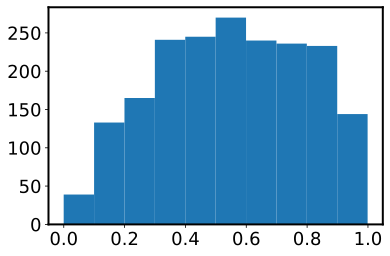

In [32]:
plt.hist(LAMOST6789_DR14_zlessthan_1['z2'])

(array([1.204e+03, 1.606e+03, 2.351e+03, 1.140e+03, 1.790e+02, 2.300e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-2.36607300e-04,  6.46249553e-01,  1.29273571e+00,  1.93922187e+00,
         2.58570804e+00,  3.23219420e+00,  3.87868036e+00,  4.52516652e+00,
         5.17165268e+00,  5.81813884e+00,  6.46462500e+00]),
 <BarContainer object of 10 artists>)

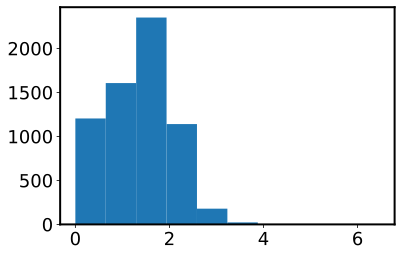

In [28]:
plt.hist(LAMOST6789_DR14['z2'])

In [18]:
len(LAMOST6789_DR14)

6507

## LAMOST6789_DR14_galaxy

In [23]:
LAMOST6789_DR14_galaxy=LAMOST6789_DR14[LAMOST6789_DR14['class']=='GALAXY']
LAMOST6789_DR14_galaxy=drop_index(LAMOST6789_DR14_galaxy)

In [24]:
len(LAMOST6789_DR14_galaxy)

20

In [67]:
for i in range(len(LAMOST6789_DR14_galaxy)):    
    print(LAMOST6789_DR14_galaxy['plate'][i],',',LAMOST6789_DR14_galaxy['mjd'][i],',',LAMOST6789_DR14_galaxy['fiberid'][i])

5888 , 56041 , 477
6877 , 56544 , 124
5776 , 56010 , 835
5775 , 56009 , 648
2644 , 54210 , 481
557 , 52253 , 421
6703 , 56636 , 866
898 , 52606 , 184
5979 , 56329 , 242
1704 , 53178 , 443
1584 , 52943 , 529
2659 , 54498 , 423
6150 , 56187 , 221
873 , 52674 , 224
2660 , 54504 , 147
851 , 52376 , 417
2285 , 53700 , 104
400 , 51820 , 378
7883 , 57331 , 834
2015 , 53819 , 618


ra1       dec1  distance                objid         ra2  \
159   165.671600  18.057940  0.026615  1237668288014254492  165.671870   
438     1.751603  25.130630  0.000025  1237666245230723486    1.751597   
706   136.222000  24.375420  0.046034  1237665127988133989  136.221280   
1097  137.941700  23.853520  0.043179  1237667142866174148  137.942340   
1510  182.453500  22.742390  0.000845  1237667735581556824  182.453530   
1713  146.896800  57.534050  0.000054  1237654383591686334  146.896910   
1786  162.178400  53.912670  0.035511  1237657591928193172  162.178070   
2784  136.176700  45.554730  0.000207  1237657607503216766  136.176630   
3439  186.003500  22.603830  0.039386  1237667782835175614  186.003490   
3683  211.309700  14.632620  0.000041  1237668348134424665  211.309690   
3702  122.608500  23.699020  0.009011  1237661087492538688  122.608630   
3828  187.630700  25.309480  0.000287  1237667447804657818  187.630760   
4055  356.295200  12.311140  0.049778  1237678859006902380  356.294810   
4712  154.792000  48.079770  0.000192  1237657628983754852  154.792020   
4840  190.713900  24.525350  0.000866  1237667911132381338  190.713920   
5369  199.439600   5.736360  0.000039  1237655126626402397  199.439570   
5451  136.607700  18.672800  0.000581  1237667292651389186  136.607730   
5601   22.827840   0.858318  0.000025  1237663785281126550   22.827857   
5915   35.306450  -3.094324  0.001808  1237679255745593492   35.306438   
6007  188.036300  34.788930  0.000408  1237665024906166410  188.036350   

           dec2        z2    mjd  plate  fiberid   class  
159   18.058297  0.472945  56041   5888      477  GALAXY  
438   25.130627  0.240889  56544   6877      124  GALAXY  
706   24.375854  0.562878  56010   5776      835  GALAXY  
1097  23.853962  0.352828  56009   5775      648  GALAXY  
1510  22.742391  0.025894  54210   2644      481  GALAXY  
1713  57.534072  0.143325  52253    557      421  GALAXY  
1786  53.912142  0.272374  56636   6703      866  GALAXY  
2784  45.554774  0.181150  52606    898      184  GALAXY  
3439  22.603176  0.415751  56329   5979      242  GALAXY  
3683  14.632615  0.101498  53178   1704      443  GALAXY  
3702  23.698942  0.133509  52943   1584      529  GALAXY  
3828  25.309501  0.022285  54498   2659      423  GALAXY  
4055  12.311877  0.654032  56187   6150      221  GALAXY  
4712  48.079782  0.051020  52674    873      224  GALAXY  
4840  24.525371  0.267761  54504   2660      147  GALAXY  
5369   5.736363  0.273360  52376    851      417  GALAXY  
5451  18.672799  0.156029  53700   2285      104  GALAXY  
5601   0.858306  0.160497  51820    400      378  GALAXY  
5915  -3.094352  0.099030  57331   7883      834  GALAXY  
6007  34.788931  0.070801  53819   2015      618  GALAXY

## zwarning=16

In [45]:
LAMOST6789_DR14_2=pd.read_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST6789_SDSS14_2_brettlv.csv')#zwarning=16

In [46]:
LAMOST6789_DR14_2

ra1      dec1  distance                objid        ra2       dec2  \
0  170.9954  38.38107  0.001970  1237662224062742537  170.99540  38.381032   
1  208.9731  38.57465  0.003413  1237664296372207716  208.97302  38.574642   
2  216.8984  26.53741  0.002358  1237665429172125706  216.89837  26.537373   
3  228.6794  36.84713  0.012595  1237661874028871772  228.67946  36.847337   

         z2    mjd  plate  fiberid class  
0  0.105427  53446   2037      524   QSO  
1  0.050176  53460   2014      616   QSO  
2  0.363606  53827   2135      340   QSO  
3  0.370531  53083   1353      580   QSO

## LAMOST6789_DR14_QSO

In [20]:
LAMOST6789_DR14_QSO=LAMOST6789_DR14[LAMOST6789_DR14['class']=='QSO']
LAMOST6789_DR14_QSO=drop_index(LAMOST6789_DR14_QSO)

In [21]:
len(LAMOST6789_DR14_QSO)

6483

## DR14_prop

In [29]:
DR14_prop=Table.read('/Volumes/ExtremeSSD/Survey_fits/SDSS/DR14/dr14q_spec_prop.fits')

In [36]:
len(DR14_prop),len(DR14_prop_ext)

(526265, 526265)

In [31]:
DR14_prop.colnames

['SDSS_NAME',
 'RA',
 'DEC',
 'SDSS_ID',
 'PLATE',
 'MJD',
 'FIBERID',
 'REDSHIFT',
 'SN_RATIO_CONT',
 'MIN_WAVE',
 'MAX_WAVE',
 'PL_NORM',
 'PL_NORM_ERR',
 'PL_SLOPE',
 'PL_SLOPE_ERR',
 'CONT_RED_CHI2',
 'HOST_FR_4200',
 'HOST_FR_5100',
 'PCA_RED_CHI2',
 'QUALITY_PCA',
 'LOG_L1350',
 'LOG_L1350_ERR',
 'QUALITY_L1350',
 'LOG_L3000',
 'LOG_L3000_ERR',
 'QUALITY_L3000',
 'LOG_L4400',
 'LOG_L4400_ERR',
 'QUALITY_L4400',
 'LOG_L5100',
 'LOG_L5100_ERR',
 'QUALITY_L5100',
 'FBC_FR_3000',
 'LOGL_FE_UV',
 'LOGL_FE_UV_ERR',
 'LOGL_FE_OP',
 'LOGL_FE_OP_ERR',
 'EW_FE_UV',
 'EW_FE_UV_ERR',
 'EW_FE_OP',
 'EW_FE_OP_ERR',
 'LINE_NPIX_HA',
 'LINE_MED_SN_HA',
 'LINE_NPIX_HB',
 'LINE_MED_SN_HB',
 'LINE_NPIX_HG',
 'LINE_MED_SN_HG',
 'LINE_NPIX_MGII',
 'LINE_MED_SN_MGII',
 'LINE_NPIX_CIII',
 'LINE_MED_SN_CIII',
 'LINE_NPIX_CIV',
 'LINE_MED_SN_CIV',
 'LINE_NPIX_LYA',
 'LINE_MED_SN_LYA',
 'LYA_LINE_STATUS',
 'LYA_LINE_CHI2',
 'LYA_LINE_RED_CHI2',
 'LYA_NDOF',
 'CIV_LINE_STATUS',
 'CIV_LINE_CHI2',
 'CIV_LINE

## DR14_prop_ext

In [30]:
DR14_prop_ext=Table.read('/Volumes/ExtremeSSD/Survey_fits/SDSS/DR14/dr14q_spec_prop_ext.fits')

In [32]:
DR14_prop_ext.colnames

['SDSS_NAME',
 'RA',
 'DEC',
 'SDSS_ID',
 'PLATE',
 'MJD',
 'FIBERID',
 'REDSHIFT',
 'SN_RATIO_CONT',
 'MIN_WAVE',
 'MAX_WAVE',
 'PL_NORM',
 'PL_NORM_ERR',
 'PL_SLOPE',
 'PL_SLOPE_ERR',
 'CONT_RED_CHI2',
 'HOST_FR_4200',
 'HOST_FR_5100',
 'PCA_RED_CHI2',
 'QUALITY_PCA',
 'LOG_L1350',
 'LOG_L1350_ERR',
 'QUALITY_L1350',
 'LOG_L3000',
 'LOG_L3000_ERR',
 'QUALITY_L3000',
 'LOG_L4400',
 'LOG_L4400_ERR',
 'QUALITY_L4400',
 'LOG_L5100',
 'LOG_L5100_ERR',
 'QUALITY_L5100',
 'FBC_FR_3000',
 'LOGL_FE_UV',
 'LOGL_FE_UV_ERR',
 'LOGL_FE_OP',
 'LOGL_FE_OP_ERR',
 'EW_FE_UV',
 'EW_FE_UV_ERR',
 'EW_FE_OP',
 'EW_FE_OP_ERR',
 'LINE_NPIX_HA',
 'LINE_MED_SN_HA',
 'LINE_NPIX_HB',
 'LINE_MED_SN_HB',
 'LINE_NPIX_HG',
 'LINE_MED_SN_HG',
 'LINE_NPIX_MGII',
 'LINE_MED_SN_MGII',
 'LINE_NPIX_CIII',
 'LINE_MED_SN_CIII',
 'LINE_NPIX_CIV',
 'LINE_MED_SN_CIV',
 'LINE_NPIX_LYA',
 'LINE_MED_SN_LYA',
 'LYA_LINE_STATUS',
 'LYA_LINE_CHI2',
 'LYA_LINE_RED_CHI2',
 'LYA_NDOF',
 'CIV_LINE_STATUS',
 'CIV_LINE_CHI2',
 'CIV_LINE

In [58]:
LAMOST6789_DR14_2.columns

Index(['ra1', 'dec1', 'distance', 'objid', 'ra2', 'dec2', 'z2', 'mjd', 'plate',
       'fiberid', 'class'],
      dtype='object')

In [64]:
for i in range(len(LAMOST6789_DR14_2)):    
    print(LAMOST6789_DR14_2['plate'][i],',',LAMOST6789_DR14_2['mjd'][i],',',LAMOST6789_DR14_2['fiberid'][i])

2037 , 53446 , 524
2014 , 53460 , 616
2135 , 53827 , 340
1353 , 53083 , 580


In [61]:
for i in range(len(LAMOST6789_DR14_2)):
    
    DR14_select= DR14_prop[DR14_prop['MJD']==LAMOST6789_DR14_2['mjd'][i]]

    DR14_select= DR14_select[DR14_select['PLATE']==LAMOST6789_DR14_2['plate'][i]]

    DR14_select= DR14_select[DR14_select['FIBERID']==LAMOST6789_DR14_2['fiberid'][i]]
    
    if len(DR14_select)>0:
        print(i,DR14_select)

2     SDSS_NAME          RA       DEC        SDSS_ID     PLATE ... QUALITY_REDD BI_CIV ERR_BI_CIV BAL_FLAG
                                                             ...              km / s   km / s           
------------------ --------- --------- --------------- ----- ... ------------ ------ ---------- --------
142735.60+263214.5 216.89837 26.537373 2135-53827-0340  2135 ...          0.0    0.0        0.0      0.0
3     SDSS_NAME          RA       DEC        SDSS_ID     PLATE ... QUALITY_REDD BI_CIV ERR_BI_CIV BAL_FLAG
                                                             ...              km / s   km / s           
------------------ --------- --------- --------------- ----- ... ------------ ------ ---------- --------
151443.07+365050.4 228.67946 36.847337 1353-53083-0580  1353 ...          0.0    0.0        0.0      0.0


In [60]:
for i in range(len(LAMOST6789_DR14_2)):
    
    DR14_select= DR14_prop_ext[DR14_prop_ext['MJD']==LAMOST6789_DR14_2['mjd'][i]]

    DR14_select= DR14_select[DR14_select['PLATE']==LAMOST6789_DR14_2['plate'][i]]

    DR14_select= DR14_select[DR14_select['FIBERID']==LAMOST6789_DR14_2['fiberid'][i]]
    
    if len(DR14_select)>0:
        print(i,DR14_select)

2     SDSS_NAME          RA       DEC        SDSS_ID      ... FIRST_FLUX FIRST_SNR  SDSS2FIRST_SEP      Separation     
                                                        ...    mJy         -          arcsec            arcsec       
------------------ --------- --------- ---------------- ... ---------- ---------- -------------- --------------------
142735.60+263214.5 216.89837 26.537373 2135-53827-0340  ...  42.720001 257.553405       0.039957 0.030859910205263096
3     SDSS_NAME          RA       DEC        SDSS_ID      ... FIRST_FLUX FIRST_SNR  SDSS2FIRST_SEP      Separation    
                                                        ...    mJy         -          arcsec            arcsec      
------------------ --------- --------- ---------------- ... ---------- ---------- -------------- -------------------
151443.07+365050.4 228.67946 36.847337 1353-53083-0580  ...  48.549999 301.155169        0.34035 0.01027126784221397


In [62]:
DR14_select

<Table length=1>
    SDSS_NAME          RA       DEC        SDSS_ID     PLATE ... QUALITY_REDD  BI_CIV ERR_BI_CIV BAL_FLAG
                                                             ...               km / s   km / s           
     bytes18        float64   float64      bytes16     int64 ...   float64    float64  float64   float64 
------------------ --------- --------- --------------- ----- ... ------------ ------- ---------- --------
151443.07+365050.4 228.67946 36.847337 1353-53083-0580  1353 ...          0.0     0.0        0.0      0.0

In [54]:
DR14_select= DR14_prop_ext[DR14_prop_ext['MJD']==53446]

DR14_select= DR14_select[DR14_select['PLATE']==2037]

DR14_select= DR14_select[DR14_select['FIBERID']==524]


In [55]:
DR14_select

<Table length=0>
SDSS_NAME    RA     DEC   SDSS_ID PLATE  MJD  ... FIRST_MATCHED FIRST_FLUX FIRST_SNR SDSS2FIRST_SEP Separation
                                              ...       -          mJy         -         arcsec       arcsec  
 bytes18  float64 float64 bytes16 int64 int64 ...     int16      float64    float64     float64      float64  
--------- ------- ------- ------- ----- ----- ... ------------- ---------- --------- -------------- ----------

# LAMOST DR10

In [34]:
LAMOST_DR10=fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/dr10_v0_LRS_catalogue_q1q2q3.fits.gz') #zwarning=0

In [35]:
LAMOST_DR10.info()

Filename: /Users/lyubing/Downloads/LAMOST_青年研究员/dr10_v0_LRS_catalogue_q1q2q3.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1                1 BinTableHDU    127   594239R x 36C   [J, 19A, 10A, J, J, 40A, I, I, D, D, E, E, E, E, E, 20A, 20A, E, E, 25A, E, E, E, E, E, E, E, 16A, 10A, 60A, 80A, E, E, D, D, E]   


In [36]:
LAMOST_DR10[1].data.columns

ColDefs(
    name = 'obsid'; format = 'J'; disp = 'I8'
    name = 'designation'; format = '19A'; disp = 'A19'
    name = 'obsdate'; format = '10A'; disp = 'A10'
    name = 'lmjd'; format = 'J'; disp = 'I5'
    name = 'mjd'; format = 'J'; disp = 'I5'
    name = 'planid'; format = '40A'; disp = 'A40'
    name = 'spid'; format = 'I'; disp = 'I4'
    name = 'fiberid'; format = 'I'; disp = 'I4'
    name = 'ra_obs'; format = 'D'; unit = 'deg'; disp = 'F16.10'
    name = 'dec_obs'; format = 'D'; unit = 'deg'; disp = 'F16.10'
    name = 'snru'; format = 'E'; disp = 'F6.2'
    name = 'snrg'; format = 'E'; disp = 'F6.2'
    name = 'snrr'; format = 'E'; disp = 'F6.2'
    name = 'snri'; format = 'E'; disp = 'F6.2'
    name = 'snrz'; format = 'E'; disp = 'F6.2'
    name = 'class'; format = '20A'; disp = 'A20'
    name = 'subclass'; format = '20A'; disp = 'A20'
    name = 'z'; format = 'E'; disp = 'F21.10'
    name = 'z_err'; format = 'E'; disp = 'F21.10'
    name = 'magtype'; format = '25A'; disp =

In [52]:
LAMOST_DR10[1].data[0]

(937801001, 'J025715.16+064957.3', '2021-10-29', 59517, 59516, 'EG025613N082253M02', 1, 1, 44.3131952, 6.8326097, 0.0, 4.53, 16.17, 54.3, 55.57, 'STAR', 'dM3', 7.359e-05, 7.73e-06, 'gri', 18.3, 17.11, 15.92, 99.0, 99.0, 99.0, 99.0, 'LEGUE_LCH', 'Obj', 'LCH100020', '17818105531231008', 0.0, 0.0, 44.3131952, 6.8326097, -178.0)

## LAMOST_DR10_qso

In [37]:
LAMOST_DR10_data=LAMOST_DR10[1].data

LAMOST_DR10_qso=LAMOST_DR10_data[LAMOST_DR10_data['class']=='QSO']

In [38]:
LAMOST_DR10_qso

FITS_rec([( 937801018, 'J025725.21+064543.3', '2021-10-29', 59517, 59516, 'EG025613N082253M02',  1,  18,  44.3550634,  6.7620514, 0.  , 2.16, 2.73, 2.82, 1.11, 'QSO', 'Non', 1.350253, -9.99900e+03, 'grizy', 19.72, 19.23, 19.17, 19.11, 19.17, 99., 99., 'LEGAS_ZYX', 'Obj', 'LABEL7', '-', 0., 0.,  44.3550634,  6.7620514, -121.),
          ( 937802019, 'J024913.53+065428.4', '2021-10-29', 59517, 59516, 'EG025613N082253M02',  2,  19,  42.306392 ,  6.9078921, 0.35, 1.2 , 2.45, 3.22, 1.56, 'QSO', 'Non', 1.28366 ,  2.77240e-04, 'grizy', 19.99, 19.57, 19.59, 19.47, 19.5 , 99., 99., 'LEGAS_ZYX', 'Obj', 'LABEL7', '-', 0., 0.,  42.306392 ,  6.9078921,    0.),
          ( 937802054, 'J025013.91+071455.8', '2021-10-29', 59517, 59516, 'EG025613N082253M02',  2,  54,  42.5579896,  7.248858 , 0.51, 1.28, 2.44, 2.84, 1.48, 'QSO', 'Non', 1.399742, -9.99900e+03, 'grizy', 20.13, 19.66, 19.39, 19.73, 19.62, 99., 99., 'LEGAS_ZYX', 'Obj', 'LABEL7', '-', 0., 0.,  42.5579896,  7.248858 ,    0.),
          ...,
 

In [23]:
LAMOST_DR10_class_=[]
for i in LAMOST_DR10_data['class']:
    if i not in LAMOST_DR10_class_:
        LAMOST_DR10_class_.append(i)
        

In [24]:
LAMOST_DR10_class_

['STAR', 'GALAXY', 'QSO']

In [25]:
len(LAMOST_DR10_qso)

3963

LAMOST_DR10_qso.columns

df_LAMOST_DR10_qso_obsids = pd.DataFrame(LAMOST_DR10_qso['obsid'], columns =['obsid'])

df_LAMOST_DR10_qso_obsids.to_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST_DR10_qso_obsids.csv',index=False)

In [21]:
df_LAMOST_DR10_qso_obsids.columns

Index(['obsid'], dtype='object')

In [39]:
df_LAMOST_DR10_qso_obsids_ra_dec = pd.DataFrame({'obsid':LAMOST_DR10_qso['obsid'],
                                                'ra':LAMOST_DR10_qso['ra_obs'],
                                                'dec':LAMOST_DR10_qso['dec_obs']})

In [40]:
len(df_LAMOST_DR10_qso_obsids_ra_dec)

3963

df_LAMOST_DR10_qso_obsids_ra_dec.to_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST_DR10_qso_obsids_ra_dec.csv',index=False)

## match LAMOSTDR10_SDSS16

In [26]:
LAMOSTDR10_SDSS16=pd.read_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST_DR10_SDSS16_brettlv_0.csv') #zwarning=0

In [27]:
len(LAMOSTDR10_SDSS16)

1541

In [52]:
LAMOSTDR10_SDSS16

OBSID       ra1      dec1  distance                objid  \
0      995105123  153.0108  30.21751  0.000372  1237665097393963129   
1      995414071  222.7866  27.15748  0.002840  1237665180061335571   
2      980108167  153.2634  35.85644  0.012299  1237664668971434032   
3     1017307052  227.9309  21.01777  0.001157  1237665549431996442   
4      995313230  215.3810  24.14580  0.002480  1237665531712438447   
...          ...       ...       ...       ...                  ...   
1536  1003213154  227.4370  11.74784  0.002290  1237662530608693636   
1537  1016310033  207.5752  24.12595  0.000253  1237665567141003573   
1538   965301069  147.7171  36.09168  0.001873  1237661137957748824   
1539   975401069  147.7171  36.09168  0.001873  1237661137957748824   
1540   976001069  147.7171  36.09168  0.001873  1237661137957748824   

            ra2       dec2        z2  zwarning   class    mjd  plate  fiberid  
0     153.01084  30.217512  0.049827         0     QSO  53358   1953       81  
1     222.78651  27.157478  0.064495         0     QSO  54208   2142      637  
2     153.26325  35.856598  0.078852         0     QSO  53389   1951      614  
3     227.93086  21.017765  0.080478         0     QSO  54525   2156      390  
4     215.38102  24.145830  0.084079         0     QSO  53800   2128       38  
...         ...        ...       ...       ...     ...    ...    ...      ...  
1536  227.43697  11.747815  0.000000       646  GALAXY  56017   5483       15  
1537  207.57519  24.125949  0.000000       646  GALAXY  56072   6001      779  
1538  147.71702  36.091682  0.000000       646  GALAXY  57449   8852      221  
1539  147.71702  36.091682  0.000000       646  GALAXY  57449   8852      221  
1540  147.71702  36.091682  0.000000       646  GALAXY  57449   8852      221  

[1541 rows x 13 columns]

In [28]:
dr10matchsdss16files_fits_path=[]
dr10matchsdss16files_fits=os.listdir('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/')
for i in dr10matchsdss16files_fits:
    if i.endswith('fits.gz'):
        dr10matchsdss16files_fits_path.append(i)

In [29]:
dr10matchsdss16files_fits
    

['spec-59646-HD141501N234109M02_sp04-172.fits.gz',
 'spec-59585-HD095221N375452M02_sp11-077.fits.gz',
 'spec-59647-HD141644N531548M01_sp09-129.fits.gz',
 'spec-59551-HD093702N162616M01_sp15-097.fits.gz',
 'spec-59614-HD083415N451147B02_sp08-152.fits.gz',
 'spec-59640-HD150403N104406M01_sp06-186.fits.gz',
 'spec-59550-HD100305N461149M02_sp03-064.fits.gz',
 'spec-59674-HD155907N503821M02_sp09-054.fits.gz',
 'spec-59703-HD164551N460240M01_sp09-223.fits.gz',
 'spec-59581-HD100632N393013M02_sp05-123.fits.gz',
 'spec-59609-HD095221N375452M03_sp12-084.fits.gz',
 'spec-59614-HD120800N003716M02_sp11-212.fits.gz',
 'spec-59647-HD123751N041718M02_sp14-108.fits.gz',
 'spec-59585-HD113827N080803M02_sp16-084.fits.gz',
 'spec-59523-EG003455N132216M01_sp06-245.fits.gz',
 'spec-59551-HD093702N162616M01_sp15-146.fits.gz',
 'spec-59635-HD131828N011447M01_sp06-051.fits.gz',
 'spec-59669-HD123847N391831M02_sp12-066.fits.gz',
 'spec-59674-HD141736N112006M01_sp05-183.fits.gz',
 'LAMOST_no_z_obs',
 'spec-5958

In [48]:
Fits_DR10_dir

'/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/'

## Delta_z_lt0dot1_obs

In [42]:
Delta_z_lt0dot1_obs=[]
Z_lamost=[]
Z_SDSS=[]

for i in dr10matchsdss16files_fits_path:
    LAMOST_dr10_qsobySDSS_dir=os.path.join(Fits_DR10_dir,'LAMOST_dr10_qsobySDSS/')  
    files_fits_path_i=os.path.join(LAMOST_dr10_qsobySDSS_dir,i)
    if os.path.exists(files_fits_path_i):
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']

        if  len(LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid_i])>0:
            LAMOSTDR10_SDSS16_QSO_i= LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid_i]
            if abs(hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0]) <0.1:
                Delta_z_lt0dot1_obs.append(files_fits_path_i)
                Z_lamost.append(hdul_i[0].header['Z'])
                Z_SDSS.append(LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])
                
                print('*****,',obsid_i)
                print(hdul_i[0].header['Z'],hdul_i[0].header['Z_ERR'],LAMOSTDR10_SDSS16_QSO_i['z2'].values[0],hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])
                #print(LAMOSTDR10_SDSS16_QSO_i)
                print('************************')

*****, 995304172
1.77235 0.00025459 1.771086 0.0012640000000001539
************************
*****, 965311077
0.205387 0.00795 0.2055347 -0.0001477000000000006
************************
*****, 995909129
0.761284 0.0004973 0.7581016 0.0031823999999999186
************************
*****, 948815097
0.416529 -9999 0.4157251 0.0008038999999999685
************************
*****, 978108152
0.254398 3.1e-05 0.2543997 -1.6999999999933735e-06
************************
*****, 991606186
0.281424 0.0 0.2820169 -0.0005929000000000073
************************
*****, 948403064
0.47 -9999 0.4709931 -0.0009931000000000245
************************
*****, 1001809054
0.896016 0.012149 0.8966451 -0.000629099999999938
************************
*****, 1011109223
1.1457 0.0007484 1.146664 -0.0009639999999999649
************************
*****, 963505123
1.70543 0.0002869 1.707583 -0.0021530000000000715
************************
*****, 976012084
1.66474 0.00038539 1.662766 0.0019740000000001423
***********************

*****, 978205229
0.380024 0.00453 0.3796816 0.00034239999999996495
************************
*****, 997807054
1.671631 0.022124 1.675773 -0.004141999999999868
************************
*****, 1009602026
1.75591 0.00018282 1.757038 -0.0011280000000000179
************************
*****, 965305196
1.65658 0.00031559 1.658608 -0.002028000000000141
************************
*****, 1003206168
1.54838 0.00016447 1.546341 0.002039000000000124
************************
*****, 976013225
0.64127 5.61e-05 0.640313 0.0009569999999999856
************************
*****, 991510078
0.452094 0.009827 0.4501833 0.0019106999999999874
************************
*****, 948814140
1.52291 -5.0 1.523831 -0.0009209999999999496
************************
*****, 975406228
0.80226 0.00017074 0.8036342 -0.001374199999999992
************************
*****, 951506228
0.474111 -9999 0.4729531 0.0011578999999999895
************************
*****, 997811034
3.2345 0.04743 3.233065 0.0014350000000002971
************************


*****, 998301173
0.4035 -9999 0.4026575 0.0008425000000000238
************************
*****, 995211059
0.877289 0.00013964 0.8758538 0.0014351999999999698
************************
*****, 965406155
2.31821 0.00026061 2.315399 0.002810999999999897
************************
*****, 951508235
1.58795 0.00028946 1.587712 0.00023799999999996047
************************
*****, 948403159
1.277731 0.018558 1.274174 0.0035570000000000324
************************
*****, 978305108
1.6978 0.00020594 1.699956 -0.0021560000000000468
************************
*****, 951509024
0.502289 -9999 0.5023 -1.0999999999983245e-05
************************
*****, 938813132
1.61735 0.00017302 1.626872 -0.00952200000000003
************************
*****, 950308169
0.582912 4.097e-05 0.5843183 -0.0014062999999999715
************************
*****, 975411077
0.205736 0.00019 0.2055347 0.00020130000000001536
************************
*****, 995306074
0.605741 0.00012577 0.6067963 -0.0010552999999999813
*****************

*****, 966407215
1.958007 0.025145 1.961915 -0.003908000000000023
************************
*****, 999501001
0.225354 0.000206 0.2248498 0.0005042000000000102
************************
*****, 1003209135
2.106 -9999 2.108957 -0.0029570000000003205
************************
*****, 998902245
0.572151 0.00012619 0.5726823 -0.0005313000000000123
************************
*****, 1000108217
1.39319 -9999 1.393758 -0.000568000000000124
************************
*****, 948806229
1.118266 -9999 1.119632 -0.0013659999999999783
************************
*****, 949408154
1.58439 0.00303007 1.585582 -0.0011920000000000819
************************
*****, 975407152
1.944365 0.029456 1.966325 -0.0219600000000002
************************
*****, 991014006
0.48 -9999 0.4800077 -7.699999999999374e-06
************************
*****, 949412044
1.55 -9999 1.548138 0.0018620000000000303
************************
*****, 950003025
0.574114 0.00020465 0.5745074 -0.0003933999999999882
************************
*****, 1016

*****, 993903010
1.88358 0.00027817 1.881554 0.0020260000000000833
************************
*****, 995312101
1.32485 0.0006531 1.324156 0.0006939999999999724
************************
*****, 948806156
1.31223 0.00042587 1.313876 -0.0016460000000000363
************************
*****, 1011108021
1.74852 0.00043498 1.749222 -0.0007019999999999804
************************
*****, 1016302127
1.99583 0.0002356 1.991402 0.0044280000000000985
************************
*****, 948401220
2.37564 0.00022226 2.378711 -0.003070999999999824
************************
*****, 951509062
1.418867 -9999 1.429222 -0.010354999999999892
************************
*****, 1017307166
0.606513 -9999 0.6095245 -0.003011500000000056
************************
*****, 938806199
1.77694 0.000601 1.783813 -0.006873000000000129
************************
*****, 997804160
0.693398 0.00023873 0.6935071 -0.00010910000000008413
************************
*****, 966414057
1.63764 0.00016323 1.638464 -0.0008239999999999359
**************

*****, 965304176
2.53003 0.00022987 2.567722 -0.03769199999999984
************************
*****, 1009607003
1.849157 -9999 1.859561 -0.01040400000000008
************************
*****, 975405026
2.30857 0.00027583 2.320844 -0.012274000000000118
************************
*****, 998912133
0.4175 -9999 0.4171114 0.0003885999999999612
************************
*****, 1016308230
1.79143 0.00031633 1.781811 0.009619000000000044
************************
*****, 949406081
1.15 -9999 1.151783 -0.00178300000000009
************************
*****, 950002107
0.9855 -9999 0.9849452 0.0005548000000000775
************************
*****, 995803191
2.349035 0.036307 2.353401 -0.004365999999999648
************************
*****, 949613057
1.502 -9999 1.508139 -0.0061389999999998945
************************
*****, 991005171
0.633364 8.392e-05 0.6334283 -6.430000000001712e-05
************************
*****, 938814170
1.0 -9999 0.9966714 0.003328600000000015
************************
*****, 995207041
0.916535 

*****, 1011110022
1.24 -9999 1.240363 -0.00036300000000011323
************************
*****, 991014145
1.22555 0.00527935 1.223424 0.0021259999999998502
************************
*****, 965406198
1.55032 0.00025775 1.549441 0.0008789999999998521
************************
*****, 949416013
0.571758 0.00014488 0.5723429 -0.0005848999999999993
************************
*****, 964604012
1.7291 0.0001198 1.730525 -0.0014250000000000096
************************
*****, 965410080
1.42 -9999 1.419795 0.00020500000000001073
************************
*****, 991014084
1.05 -9999 1.045921 0.004078999999999944
************************
*****, 949407049
1.03778 0.00020929 1.039366 -0.0015860000000000873
************************
*****, 964615058
0.306025 8.965e-05 0.306345 -0.00031999999999998696
************************
*****, 966610161
1.2 -9999 1.197309 0.002690999999999999
************************
*****, 1011115041
1.22049 0.00014649 1.223506 -0.0030159999999999076
************************
*****, 95021

*****, 995909111
2.36964 0.00041161 2.367442 0.0021979999999999222
************************
*****, 964502018
0.601992 5.063e-05 0.6020977 -0.00010569999999998636
************************
*****, 949405019
2.06863 7.426e-05 2.06398 0.004650000000000265
************************
*****, 976006085
2.22965 0.00036885 2.226533 0.0031170000000000364
************************
*****, 1016304139
1.0499 0.00033324 1.045293 0.004607000000000028
************************
*****, 976006095
1.306263 0.016087 1.304268 0.001994999999999969
************************
*****, 998404190
0.459857 0.00012462 0.4603104 -0.0004533999999999927
************************
*****, 1001701029
1.155 -9999 1.156225 -0.0012250000000000316
************************
*****, 1009607151
2.19 -9999 2.191299 -0.001298999999999939
************************
*****, 995807208
2.504973 0.035007 2.499841 0.0051320000000001365
************************
*****, 978316192
1.8749 0.00026137 1.875948 -0.0010479999999999379
************************
*

*****, 951507036
0.68893 8.801e-05 0.6882079 0.0007221000000000588
************************
*****, 966413078
1.81185 0.00015179 1.812577 -0.0007270000000001442
************************
*****, 991602094
0.327545 8.976e-05 0.3276109 -6.590000000000762e-05
************************
*****, 995215066
0.166983 0.00019047 0.1669179 6.509999999998461e-05
************************
*****, 948804062
1.48 -9999 1.481705 -0.0017050000000000676
************************
*****, 1009703004
0.221324 8.642e-05 0.221315 8.999999999981245e-06
************************
*****, 991006208
0.745608 0.00022179 0.7449084 0.0006996000000000224
************************
*****, 1001702164
3.32991 -9999 3.3405 -0.0105900000000001
************************
*****, 998407151
0.757473 0.010154 0.7577536 -0.00028060000000007523
************************
*****, 950006132
2.311879 -9999 2.319197 -0.007318000000000158
************************
*****, 1001203101
0.771167 2.507e-05 0.7714964 -0.0003293999999999242
*******************

*****, 965408012
1.48881 -9999 1.490644 -0.0018340000000001133
************************
*****, 991615107
1.35112 0.00019385 1.353506 -0.0023859999999999992
************************
*****, 1003209114
1.21869 -9999 1.222388 -0.003697999999999979
************************
*****, 1009615103
1.84 -9999 1.835738 0.004261999999999988
************************
*****, 998903007
2.48942 -9999 2.477013 0.012407000000000057
************************
*****, 1001701005
1.02614 0.00034879 1.031779 -0.00563899999999995
************************
*****, 995911090
0.662438 0.00016012 0.6618885 0.0005494999999999806
************************
*****, 989207167
0.192929 0.009258 0.1920949 0.0008340999999999765
************************
*****, 993909067
2.33563 0.00010693 2.344379 -0.008748999999999896
************************
*****, 965307240
2.67463 0.00055911 2.719275 -0.044645000000000046
************************
*****, 991502034
0.148997 3.823e-05 0.148953 4.399999999998849e-05
************************
*****, 

*****, 995808193
1.05324 0.00041018 1.054599 -0.0013590000000001101
************************
*****, 989512177
0.389625 6.338e-05 0.3893679 0.0002571000000000101
************************
*****, 963515061
2.30961 0.00055326 2.314503 -0.004893000000000036
************************
*****, 965315064
1.53038 0.00014785 1.528492 0.0018880000000001118
************************
*****, 966411120
0.331565 8.328e-05 0.3310064 0.0005586000000000202
************************
*****, 951505074
1.622253 -9999 1.629526 -0.007273000000000085
************************
*****, 995907175
0.777495 0.010652 0.7749928 0.00250220000000001
************************
*****, 997813079
2.42623 0.00045286 2.427685 -0.001454999999999984
************************
*****, 998305147
2.25945 0.00016772 2.264952 -0.005501999999999896
************************
*****, 989512115
2.252484 0.037148 2.240001 0.012483000000000022
************************
*****, 1001809188
0.28613 0.000366 0.286133 -3.000000000030756e-06
******************

*****, 1011108146
1.88849 0.00040829 1.885054 0.0034359999999999946
************************
*****, 990807187
0.098901 0.005364 0.09889974 1.2600000000029254e-06
************************
*****, 1003202127
1.60656 0.00038987 1.600844 0.005716000000000054
************************
*****, 951504134
1.155 -9999 1.151744 0.0032559999999999256
************************
*****, 975514111
2.29991 0.00032143 2.296993 0.0029170000000000584
************************
*****, 993914197
1.83902 0.00040667 1.841311 -0.002290999999999821
************************
*****, 995301043
0.311357 7.184e-05 0.3102726 0.0010843999999999854
************************
*****, 1009708162
1.26983 0.00015775 1.271839 -0.0020089999999999275
************************
*****, 991605143
1.61958 0.00016207 1.622677 -0.0030969999999999054
************************
*****, 1009614075
1.61 -9999 1.612752 -0.0027519999999998657
************************
*****, 995302015
0.38497 0.00018719 0.3852231 -0.0002531000000000061
*****************

In [43]:
len(Delta_z_lt0dot1_obs)

1427

In [44]:
dr10matchsdss16files_fits_path[0]

'spec-59646-HD141501N234109M02_sp04-172.fits.gz'

## dict_fitspath_obsid

In [46]:
dict_fitspath_obsid= dict(zip(dr10matchsdss16files_fits_path, Delta_z_lt0dot1_obs))
dict_fitspath_zlamost= dict(zip(dr10matchsdss16files_fits_path, Z_lamost))
dict_fitspath_zSDSS= dict(zip(dr10matchsdss16files_fits_path, Z_SDSS))

In [55]:
dr10matchsdss16files_fits_path[0]

'spec-59646-HD141501N234109M02_sp04-172.fits.gz'

In [56]:
pd_LAMOST_dr10_match_z_SDSS16=pd.DataFrame([])
pd_LAMOST_dr10_match_z_SDSS16['#cols: spUrl']=dr10matchsdss16files_fits_path
pd_LAMOST_dr10_match_z_SDSS16['zlamost']=Z_lamost
pd_LAMOST_dr10_match_z_SDSS16['zSDSS']=Z_SDSS

In [120]:
pd_LAMOST_dr10_match_z_SDSS16.to_csv('pd_LAMOST_dr10_match_z_SDSS16.csv',index=False)

In [122]:
!open .

In [106]:
for index,i in enumerate(pd_LAMOST_dr10_match_z_SDSS16['#cols: spUrl']):   
    files_fits_path_i=os.path.join(LAMOST_dr10_qsobySDSS_dir,i)
    
    if os.path.exists(files_fits_path_i):
        #print(files_fits_path_i)
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']
        ra=hdul_i[0].header['RA']
        dec=hdul_i[0].header['DEC']
        
        pd_LAMOST_dr10_match_z_SDSS16.loc[index,'objra']=ra
        pd_LAMOST_dr10_match_z_SDSS16.loc[index,'objdec']=dec
        
        
    

In [107]:
pd_LAMOST_dr10_match_z_SDSS16

#cols: spUrl   zlamost     zSDSS  \
0     spec-59646-HD141501N234109M02_sp04-172.fits.gz  1.772350  1.771086   
1     spec-59585-HD095221N375452M02_sp11-077.fits.gz  0.205387  0.205535   
2     spec-59647-HD141644N531548M01_sp09-129.fits.gz  0.761284  0.758102   
3     spec-59551-HD093702N162616M01_sp15-097.fits.gz  0.416529  0.415725   
4     spec-59614-HD083415N451147B02_sp08-152.fits.gz  0.254398  0.254400   
...                                              ...       ...       ...   
1422  spec-59637-HD102942N012928M03_sp07-149.fits.gz  1.870760  1.870873   
1423  spec-59523-EG003455N132216M01_sp13-172.fits.gz  1.889850  1.883025   
1424  spec-59732-HD150715N223351M01_sp15-066.fits.gz  0.238980  0.238889   
1425  spec-59585-HD095221N375452M02_sp08-146.fits.gz  2.271063  2.261201   
1426  spec-59666-HD141501N234109M01_sp09-207.fits.gz  2.275320  2.281270   

           objra     objdec  
0     213.502668  23.598623  
1     147.701667  39.447350  
2     215.851018  53.586442  
3     143.620016  17.675373  
4     129.245604  44.433944  
...          ...        ...  
1422  158.614880  -0.376055  
1423   10.099040  14.135390  
1424  225.619097  23.324977  
1425  149.596160  37.205097  
1426  214.664360  24.168157  

[1427 rows x 5 columns]

(array([135., 237., 146., 181., 282., 197., 160.,  68.,  12.,   9.]),
 array([-2.76146000e-03,  3.30505686e-01,  6.63772832e-01,  9.97039978e-01,
         1.33030712e+00,  1.66357427e+00,  1.99684142e+00,  2.33010856e+00,
         2.66337571e+00,  2.99664285e+00,  3.32991000e+00]),
 <BarContainer object of 10 artists>)

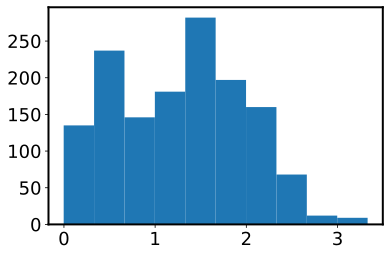

In [61]:
plt.hist(Z_lamost)

(array([165., 237., 126., 194., 284., 189., 153.,  60.,  10.,   9.]),
 array([0.0498274 , 0.37889466, 0.70796192, 1.03702918, 1.36609644,
        1.6951637 , 2.02423096, 2.35329822, 2.68236548, 3.01143274,
        3.3405    ]),
 <BarContainer object of 10 artists>)

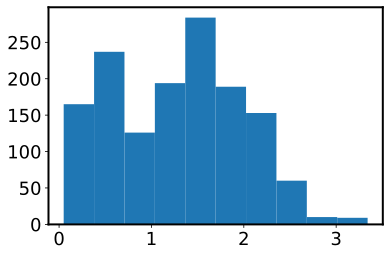

In [62]:
plt.hist(Z_SDSS)

In [63]:
len(Z_SDSS)

1427

In [34]:
LAMOSTDR10_SDSS16_class=[]
for i in LAMOSTDR10_SDSS16['class']:
    if not i in LAMOSTDR10_SDSS16_class:
        LAMOSTDR10_SDSS16_class.append(i)

In [35]:
LAMOSTDR10_SDSS16_class

['QSO', 'GALAXY', 'STAR']

## LAMOSTDR10_SDSS16_QSO

In [37]:
LAMOSTDR10_SDSS16_QSO=LAMOSTDR10_SDSS16[LAMOSTDR10_SDSS16['class']=='QSO']
LAMOSTDR10_SDSS16_QSO=drop_index(LAMOSTDR10_SDSS16_QSO)

In [38]:
len(LAMOSTDR10_SDSS16_QSO)

1501

In [39]:
LAMOSTDR10_SDSS16_QSO

OBSID       ra1       dec1  distance                objid  \
0      995105123  153.0108  30.217510  0.000372  1237665097393963129   
1      995414071  222.7866  27.157480  0.002840  1237665180061335571   
2      980108167  153.2634  35.856440  0.012299  1237664668971434032   
3     1017307052  227.9309  21.017770  0.001157  1237665549431996442   
4      995313230  215.3810  24.145800  0.002480  1237665531712438447   
...          ...       ...        ...       ...                  ...   
1496  1003109054  215.3743   4.709433  0.000808  1237654880737230850   
1497   998301175  183.6678  14.483100  0.000373  1237664289927856214   
1498   964609136  201.0331   1.553643  0.002399  1237651735229300937   
1499   951508203  151.7045  44.878880  0.000457  1237658204501508327   
1500  1009510006  158.6207  18.259220  0.003612  1237670965393489970   

            ra2       dec2        z2  zwarning class    mjd  plate  fiberid  
0     153.01084  30.217512  0.049827         0   QSO  53358   1953       81  
1     222.78651  27.157478  0.064495         0   QSO  54208   2142      637  
2     153.26325  35.856598  0.078852         0   QSO  53389   1951      614  
3     227.93086  21.017765  0.080478         0   QSO  54525   2156      390  
4     215.38102  24.145830  0.084079         0   QSO  53800   2128       38  
...         ...        ...       ...       ...   ...    ...    ...      ...  
1496  215.37432   4.709433  1.923583        64   QSO  55653   4781      506  
1497  183.66783  14.483105  2.319486        64   QSO  56010   5392       62  
1498  201.03306   1.553672  2.504058        64   QSO  55328   4006      146  
1499  151.70450  44.878882  2.868805        64   QSO  57401   8287      804  
1500  158.62070  18.259183  1.479697        80   QSO  54175   2593      231  

[1501 rows x 13 columns]

In [40]:
LAMOSTDR10_SDSS16_QSO['OBSID'][0]#.head()

995105123

In [41]:
LAMOST_DR10[1].data[12]

(937801019, 'J025703.31+063618.6', '2021-10-29', 59517, 59516, 'EG025613N082253M02', 1, 19, 44.2638209, 6.6051848, 0.0, 2.14, 6.92, 13.72, 11.7, 'GALAXY', 'Non', 0.133499, 0.000404, 'fibermagr', 20.61, 18.54, 17.23, 16.6, 16.14, 99.0, 99.0, 'LEGAS_SSY', 'Obj', 'SGP', '1237670016735183110', 0.0, 0.0, 44.2638209, 6.6051848, -111.0)

In [81]:
LAMOST_DR10[1].data.columns

ColDefs(
    name = 'obsid'; format = 'J'; disp = 'I8'
    name = 'designation'; format = '19A'; disp = 'A19'
    name = 'obsdate'; format = '10A'; disp = 'A10'
    name = 'lmjd'; format = 'J'; disp = 'I5'
    name = 'mjd'; format = 'J'; disp = 'I5'
    name = 'planid'; format = '40A'; disp = 'A40'
    name = 'spid'; format = 'I'; disp = 'I4'
    name = 'fiberid'; format = 'I'; disp = 'I4'
    name = 'ra_obs'; format = 'D'; unit = 'deg'; disp = 'F16.10'
    name = 'dec_obs'; format = 'D'; unit = 'deg'; disp = 'F16.10'
    name = 'snru'; format = 'E'; disp = 'F6.2'
    name = 'snrg'; format = 'E'; disp = 'F6.2'
    name = 'snrr'; format = 'E'; disp = 'F6.2'
    name = 'snri'; format = 'E'; disp = 'F6.2'
    name = 'snrz'; format = 'E'; disp = 'F6.2'
    name = 'class'; format = '20A'; disp = 'A20'
    name = 'subclass'; format = '20A'; disp = 'A20'
    name = 'z'; format = 'E'; disp = 'F21.10'
    name = 'z_err'; format = 'E'; disp = 'F21.10'
    name = 'magtype'; format = '25A'; disp =

In [71]:
LAMOST_DR10[1].data['obsid'][0]

937801001

In [85]:
obsid_LAMOST_DR10_qso=np.array(LAMOST_DR10_qso['obsid']) 

In [86]:
for index,obsid in enumerate(obsid_LAMOST_DR10_qso): 
    if  len(LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid])>0:
        print(index,obsid)

47 938804037
56 938806168
57 938806184
58 938806185
59 938806194
60 938806199
62 938806245
69 938809033
71 938809114
76 938811162
80 938813030
81 938813057
82 938813060
83 938813132
84 938813145
86 938813172
90 938814076
91 938814170
94 938815044
96 938816152
125 948401060
126 948401061
127 948401093
129 948401168
130 948401220
131 948402135
132 948402137
133 948402157
134 948402223
136 948403064
137 948403078
138 948403094
139 948403159
140 948403196
141 948405225
142 948406165
143 948406167
144 948407085
145 948407218
146 948407219
147 948408072
148 948408162
149 948408209
150 948408229
151 948409016
152 948409023
153 948409024
154 948409057
155 948409141
156 948409158
157 948411178
158 948412138
159 948412165
160 948412179
161 948415116
162 948415169
163 948416153
164 948416179
165 948416233
167 948802032
169 948802119
173 948802156
177 948802250
182 948803179
185 948804062
186 948804073
191 948804144
193 948804174
194 948804205
195 948804216
201 948805002
202 948805009
204 94880508

2306 995802034
2308 995802052
2311 995802147
2312 995802206
2318 995803191
2319 995803193
2323 995805014
2325 995805044
2335 995807116
2336 995807153
2339 995807208
2343 995807229
2344 995807250
2348 995808193
2354 995809178
2356 995809188
2358 995810242
2361 995811069
2362 995811082
2366 995811185
2368 995813012
2370 995813034
2371 995813092
2372 995813125
2381 995814108
2382 995814127
2390 995815099
2399 995901009
2400 995901120
2401 995902088
2402 995902103
2404 995903118
2408 995905077
2409 995905137
2410 995907073
2411 995907136
2412 995907175
2413 995908230
2415 995909111
2416 995909129
2417 995909138
2418 995909142
2420 995909206
2421 995910041
2424 995911090
2425 995911178
2426 995911228
2427 995912057
2428 995913155
2429 995914113
2430 995914179
2431 995915063
2433 995915157
2434 995915185
2435 995916117
2437 997801005
2438 997801108
2445 997803013
2455 997803217
2456 997803224
2460 997804086
2462 997804160
2467 997805032
2478 997807054
2482 997808058
2484 997808146
2488 99780

## LAMOST_DR10_qso_file

## Fits_DR10_dir

In [48]:
Fits_DR10_dir='/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/'

In [49]:
files_fits_path=[]
files_fits=os.listdir('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/')
for i in files_fits:
    if i.endswith('fits.gz'):
        files_fits_path.append(i)

In [52]:
len(files_fits_path)

3854

In [53]:
files_fits_path[0]

'spec-59646-HD141501N234109M02_sp04-172.fits.gz'

In [93]:
hdul= fits.open(os.path.join(Fits_DR10_dir,files_fits_path[0]))

In [153]:
hdul[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11b        
BITPIX  =                   16 /                                                
NAXIS   =                    0 / Number of array dimensions                     
NAXIS1  =                 3908 /                                                
NAXIS2  =                    5 /                                                
EXTEND  =                    T /                                                
                                                                                
COMMENT --------FILE INFORMATION                                                
FILENAME= 'spec-59646-HD141501N234109M02_sp04-172.fits' /                       
OBSID   =            995304172 / Unique number ID of this spectrum              
AUTHOR  = 'LAMOST Pipeline'    / Who compiled the information                   
DATA_V  = 'LAMOST DR10 Q2'     / Data release version                           
N_EXTEN =                   

In [149]:
hdul[0].header['Z'],hdul[0].header['Z_ERR']

(1.77235, 0.00025459)

In [99]:
hdul[0].header['OBSID']

995304172

'————————————————\n版权声明：本文为CSDN博主「是暮涯啊」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。\n原文链接：https://blog.csdn.net/longshaonihaoa/article/details/105679517'

In [121]:
dstpath=os.path.join(Fits_DR10_dir,'LAMOST_dr10_qsobySDSS/')
os.listdir(dstpath)

['.DS_Store']

In [122]:
dstpath=os.path.join(Fits_DR10_dir,'LAMOST_dr10_galaxybySDSS/')
os.listdir(dstpath)

[]

In [123]:
dstpath=os.path.join(Fits_DR10_dir,'LAMOST_dr10_STARbySDSS/')
os.listdir(dstpath)

['.DS_Store']

for i in os.listdir(Fits_DR10_dir):
    if len(i)>50:
        os.remove(os.path.join(Fits_DR10_dir,i))

## SDSS as QSO

In [105]:
len(LAMOSTDR10_SDSS16_QSO)

1501

In [147]:
LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==992903030]

OBSID       ra1      dec1  distance                objid       ra2  \
1438  992903030  206.2376 -3.178097  0.041329  1237671990269706452  206.2374   

          dec2        z2  zwarning class    mjd  plate  fiberid  
1438 -3.178749  2.503463         0   QSO  55359   4044      376

for i in files_fits_path:
    files_fits_path_i=os.path.join(Fits_DR10_dir,i)
    if os.path.exists(files_fits_path_i):
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']

        if  len(LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid_i])>0:
            print(files_fits_path_i)
            dstpath=os.path.join(Fits_DR10_dir,'LAMOST_dr10_qsobySDSS/')
            mymovefile(files_fits_path_i,dstpath)


## Delta_z_gt0dot1_obs

In [166]:
Delta_z_gt0dot1_obs=[]
LAMOST_no_z_obs=[]


for i in files_fits_path:
    LAMOST_dr10_qsobySDSS_dir=os.path.join(Fits_DR10_dir,'LAMOST_dr10_qsobySDSS/')  
    files_fits_path_i=os.path.join(LAMOST_dr10_qsobySDSS_dir,i)
    if os.path.exists(files_fits_path_i):
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']

        if  len(LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid_i])>0:
            LAMOSTDR10_SDSS16_QSO_i= LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid_i]
            if hdul_i[0].header['Z']== -9999:
                LAMOST_no_z_obs.append(files_fits_path_i)
                
            #print(hdul_i[0].header['Z'],hdul_i[0].header['Z_ERR'],LAMOSTDR10_SDSS16_QSO_i['z2'].values[0],hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])
            elif abs(hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0]) >0.1:
                Delta_z_gt0dot1_obs.append(files_fits_path_i)
                print('*****,',obsid_i)
                print(hdul_i[0].header['Z'],hdul_i[0].header['Z_ERR'],LAMOSTDR10_SDSS16_QSO_i['z2'].values[0],hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])
                #print(LAMOSTDR10_SDSS16_QSO_i)
                print('************************')
                

*****, 978315012
1.92457 0.00020219 0.2106649 1.7139050999999998
************************
*****, 977506246
0.724845 0.775672 0.9613336 -0.23648860000000005
************************
*****, 1009705112
1.55 -9999 0.743463 0.8065370000000001
************************
*****, 950313234
2.83 -9999 2.001246 0.828754
************************
*****, 1011108092
3.78824 0.00188986 1.261178 2.527062
************************
*****, 1003103061
2.208492 -9999 1.536973 0.6715190000000002
************************
*****, 1016309077
0.103926 4.8e-05 1.82423 -1.720304
************************
*****, 991609135
1.505 -9999 2.108957 -0.6039570000000003
************************
*****, 950205074
1.255 -9999 1.772316 -0.5173160000000001
************************
*****, 1016306208
2.155 -9999 0.7449084 1.4100916
************************
*****, 964609136
0.533063 -9999 2.504058 -1.9709950000000003
************************
*****, 1009708091
0.42 -9999 2.264715 -1.8447149999999999
************************
*****, 95030

In [167]:
len(Delta_z_gt0dot1_obs)

45

In [168]:
len(LAMOST_no_z_obs)

29

In [187]:
sorted(Delta_z_gt0dot1_obs)

['/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59550-HD100305N461149M02_sp06-165.fits.gz',
 '/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59551-HD093702N162616M01_sp15-153.fits.gz',
 '/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59552-HD091118N401801M02_sp02-097.fits.gz',
 '/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59552-HD091118N401801M02_sp12-060.fits.gz',
 '/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59552-HD091118N401801M02_sp13-110.fits.gz',
 '/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59552-HD091118N401801M02_sp14-219.fits.gz',
 '/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59553-GAC111N40M1_sp11-121.fits.gz',
 '/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59553-HD091118N401801M03_sp01-155.fits.gz',
 '/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spe

In [183]:
45+29

74

In [174]:
Delta_z_gt0dot1_obs[0]

'/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59614-HD120800N003716M02_sp15-012.fits.gz'

In [ ]:
ls /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qso_left_fits/part1/

In [ ]:
file:////Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qso_left_fits/part1/spec-59523-EG003455N132216M01_sp06-206.fits.gz

In [ ]:
part2 

In [ ]:
file:////Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qso_left_fits/part2/spec-59613-HD120800N003716M02_sp13-131.fits.gz

obs_fits_path='/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/'
for i in Delta_z_gt0dot1_obs:
    cmd_mv='mv %s %s/Delta_z_gt0dot1_obs/'%(i,obs_fits_path)
    print(cmd_mv)
    os.system(cmd_mv)

In [ ]:
asera_check_results_dr10_qso_Delta_z_gt0dot1_obs.csv

ls /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/Delta_z_gt0dot1_obs/

In [180]:
obs_fits_path='/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/'
for i in LAMOST_no_z_obs:
    cmd_mv='mv %s %s/LAMOST_no_z_obs/'%(i,obs_fits_path)
    print(cmd_mv)
    os.system(cmd_mv)

mv /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59550-HD100305N461149M02_sp01-060.fits.gz /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS//LAMOST_no_z_obs/
mv /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59676-HD141829N034028M01_sp14-104.fits.gz /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS//LAMOST_no_z_obs/
mv /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59676-HD150403N104406M02_sp12-226.fits.gz /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS//LAMOST_no_z_obs/
mv /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59552-HD091118N401801M02_sp13-040.fits.gz /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS//LAMOST_no_z_obs/
mv /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59551-HD093702N162616M01_sp07-164.fits.gz /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS//LAMOST_no_z_obs/


In [171]:
3963-1501-8-32

2422

In [ ]:
2423

## SDSS galaxy

In [64]:
LAMOSTDR10_SDSS16_GALAXY=LAMOSTDR10_SDSS16[LAMOSTDR10_SDSS16['class']=='GALAXY']
LAMOSTDR10_SDSS16_GALAXY=drop_index(LAMOSTDR10_SDSS16_GALAXY)

In [65]:
LAMOSTDR10_SDSS16_GALAXY

OBSID       ra1       dec1  distance                objid        ra2  \
0    979206028  232.3793  12.540200  0.001960  1237668350290886779  232.37933   
1    989204219  140.5236  21.981480  0.000145  1237667211048583252  140.52357   
2    989514041  155.0473   1.512766  0.000181  1237651752925659474  155.04730   
3   1011114063  249.1893  46.331850  0.001307  1237651714798518482  249.18932   
4   1000713133  237.5751   4.731083  0.000082  1237655744024347033  237.57512   
5    995803175  188.5967   4.491392  0.000322  1237654879651758218  188.59669   
6    979704176  159.3601   5.686029  0.000065  1237658297923797220  159.36014   
7    995808004  190.0647   3.423427  0.002391  1237651755088478316  190.06469   
8    998302104  182.0634  15.054310  0.000099  1237661069798867065  182.06338   
9    989507134  158.7454  -0.592820  0.000112  1237648720684581000  158.74540   
10   995406144  226.7800  26.380360  0.000077  1237665126949388390  226.78001   
11   997813180  213.0945  13.815120  0.000058  1237662530602533043  213.09449   
12   965312106  150.6326  39.365610  0.000248  1237661850921205857  150.63260   
13   979710017  157.1401   5.825406  0.000337  1237658298459685032  157.14015   
14   995213202  190.2921  10.695470  0.002161  1237662238542463087  190.29209   
15   974211150  203.6608  10.588650  0.000376  1237662239085101147  203.66083   
16   998901170  189.9044  36.881970  0.001362  1237664818216173635  189.90437   
17   998903003  188.7186  38.841330  0.000153  1237662223531901064  188.71857   
18   995909018  215.8404  53.378540  0.000088  1237661387068670150  215.84043   
19   977501117  181.8863  -1.638722  0.001478  1237650762928226406  181.88630   
20   966402054  155.1862  16.043530  0.042244  1237671262281924861  155.18548   
21  1009610036  190.0161  12.658410  0.001844  1237661817096044777  190.01609   
22   998408055  214.9748  23.203640  0.001328  1237665567680823422  214.97481   
23  1017303247  225.6278  22.154450  0.000921  1237665549967818891  225.62779   
24   966403056  155.4927  17.447400  0.000182  1237668289083736110  155.49268   
25   995310185  211.8985  23.154830  0.000169  1237667912214643185  211.89855   
26   995803224  188.6914   4.950182  0.000517  1237668675623780490  188.69135   
27  1003213154  227.4370  11.747840  0.002290  1237662530608693636  227.43697   
28  1016310033  207.5752  24.125950  0.000253  1237665567141003573  207.57519   
29   965301069  147.7171  36.091680  0.001873  1237661137957748824  147.71702   
30   975401069  147.7171  36.091680  0.001873  1237661137957748824  147.71702   
31   976001069  147.7171  36.091680  0.001873  1237661137957748824  147.71702   

         dec2        z2  zwarning   class    mjd  plate  fiberid  
0   12.540199  0.020664         0  GALAXY  54265   2768      287  
1   21.981480  0.034612         0  GALAXY  53727   2290      161  
2    1.512755  0.045227         0  GALAXY  51999    503      126  
3   46.331862  0.070423         0  GALAXY  52144    627      148  
4    4.731085  0.077501         0  GALAXY  54592   2951      386  
5    4.491367  0.079630         0  GALAXY  52407    846      318  
6    5.686030  0.080256         0  GALAXY  52643   1000      287  
7    3.423434  0.083899         0  GALAXY  52326    521      454  
8   15.054299  0.084308         0  GALAXY  53467   1764      597  
9   -0.592816  0.115168         0  GALAXY  51957    273      107  
10  26.380341  0.130256         0  GALAXY  54539   2154      259  
11  13.815129  0.138212         0  GALAXY  53442   1706      387  
12  39.365617  0.143288         0  GALAXY  53033   1356      231  
13   5.825410  0.149738         0  GALAXY  52750    998        3  
14  10.695466  0.156132         0  GALAXY  52734   1233      611  
15  10.588647  0.160237         0  GALAXY  53885   1802      361  
16  36.881996  0.167152         0  GALAXY  53827   2022      333  
17  38.841328  0.223587         0  GALAXY  53495   2000      351  
18  53.378537  0.272558         0  GALAXY  56837   7340      9

In [72]:
LAMOSTDR10_SDSS16_GALAXY['OBSID']

0      979206028
1      989204219
2      989514041
3     1011114063
4     1000713133
5      995803175
6      979704176
7      995808004
8      998302104
9      989507134
10     995406144
11     997813180
12     965312106
13     979710017
14     995213202
15     974211150
16     998901170
17     998903003
18     995909018
19     977501117
20     966402054
21    1009610036
22     998408055
23    1017303247
24     966403056
25     995310185
26     995803224
27    1003213154
28    1016310033
29     965301069
30     975401069
31     976001069
Name: OBSID, dtype: int64

In [88]:
len(files_fits_path)

3854

for i in files_fits_path:
    files_fits_path_i=os.path.join(Fits_DR10_dir,i)
    if os.path.exists(files_fits_path_i):
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']

        if  len(LAMOSTDR10_SDSS16_GALAXY[LAMOSTDR10_SDSS16_GALAXY['OBSID']==obsid_i])>0:
            print(files_fits_path_i)
            dstpath=os.path.join(Fits_DR10_dir,'LAMOST_dr10_galaxybySDSS/')
            files_png_path_i=files_fits_path_i[:-7]+'png'
            #mymovefile(files_fits_path_i,dstpath)
            mymovefile(files_png_path_i,dstpath)


In [79]:
LAMOSTDR10_SDSS16_GALAXY.columns

Index(['OBSID', 'ra1', 'dec1', 'distance', 'objid', 'ra2', 'dec2', 'z2',
       'zwarning', 'class', 'mjd', 'plate', 'fiberid'],
      dtype='object')

In [99]:
for mjd_,plate_,fiberid_ in zip(LAMOSTDR10_SDSS16_GALAXY['mjd'],LAMOSTDR10_SDSS16_GALAXY['plate'],LAMOSTDR10_SDSS16_GALAXY['fiberid']):
    
    print(plate_,',',mjd_,',',fiberid_)

2768 , 54265 , 287
2290 , 53727 , 161
503 , 51999 , 126
627 , 52144 , 148
2951 , 54592 , 386
846 , 52407 , 318
1000 , 52643 , 287
521 , 52326 , 454
1764 , 53467 , 597
273 , 51957 , 107
2154 , 54539 , 259
1706 , 53442 , 387
1356 , 53033 , 231
998 , 52750 , 3
1233 , 52734 , 611
1802 , 53885 , 361
2022 , 53827 , 333
2000 , 53495 , 351
7340 , 56837 , 981
332 , 52367 , 323
5337 , 55987 , 295
1694 , 53472 , 436
2132 , 53493 , 41
2148 , 54526 , 177
2591 , 54140 , 91
2784 , 54529 , 361
4834 , 55685 , 319
5483 , 56017 , 15
6001 , 56072 , 779
8852 , 57449 , 221
8852 , 57449 , 221
8852 , 57449 , 221


dstpath=os.path.join(Fits_DR10_dir,'LAMOST_dr10_galaxybySDSS/')

## galaxybySDSS_Delta_z_lt0dot1_obs

In [89]:
len(files_fits_paths)

64

In [32]:
LAMOST_dr10_galaxybySDSS_dir=os.path.join(Fits_DR10_dir,'LAMOST_dr10_galaxybySDSS/')  
#files_fits_paths= os.listdir(LAMOST_dr10_galaxybySDSS_dir)
dr10matchsdss16galaxyfiles_fits=os.listdir(LAMOST_dr10_galaxybySDSS_dir)

NameError: name 'Fits_DR10_dir' is not defined

In [91]:
dr10matchsdss16galaxyfiles_fits_path=[]
#dr10matchsdss16galaxyfiles_fits=os.listdir('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/')
for i in dr10matchsdss16galaxyfiles_fits:
    if i.endswith('fits.gz'):
        dr10matchsdss16galaxyfiles_fits_path.append(i)

In [103]:
pathdir_LAMOST_dr10_galaxybySDSS_deltaz_lt0dot05='/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/deltaz_lt0dot05'


In [104]:
galaxybySDSS_Delta_z_lt0dot1_obs=[]
galaxybySDSS_Z_lamost=[]
galaxybySDSS_Z_SDSS=[]



for files_fits_path_i in dr10matchsdss16galaxyfiles_fits_path:

    hdul_i=fits.open( os.path.join(LAMOST_dr10_galaxybySDSS_dir,files_fits_path_i))
    obsid_i= hdul_i[0].header['OBSID']

    if  len(LAMOSTDR10_SDSS16_GALAXY[LAMOSTDR10_SDSS16_GALAXY['OBSID']==obsid_i])>0:
        LAMOSTDR10_SDSS16_GALAXY_i= LAMOSTDR10_SDSS16_GALAXY[LAMOSTDR10_SDSS16_GALAXY['OBSID']==obsid_i]
        
        if abs(hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_GALAXY_i['z2'].values[0]) <0.05:
            galaxybySDSS_Delta_z_lt0dot1_obs.append(files_fits_path_i)
            galaxybySDSS_Z_lamost.append(hdul_i[0].header['Z'])
            galaxybySDSS_Z_SDSS.append(LAMOSTDR10_SDSS16_GALAXY_i['z2'].values[0])
            
            srcfile=os.path.join(LAMOST_dr10_galaxybySDSS_dir,files_fits_path_i[:-7]+'png')
            #print(files_fits_path_i)
            mycopyfile(srcfile,pathdir_LAMOST_dr10_galaxybySDSS_deltaz_lt0dot05)
            
            #print('*****,',obsid_i)
            #print(hdul_i[0].header['Z'],hdul_i[0].header['Z_ERR'],LAMOSTDR10_SDSS16_GALAXY_i['z2'].values[0],hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_GALAXY_i['z2'].values[0])
            #print(LAMOSTDR10_SDSS16_QSO_i)
            #print(LAMOSTDR10_SDSS16_GALAXY_i['plate'].values[0],',',LAMOSTDR10_SDSS16_GALAXY_i['mjd'].values[0],',',LAMOSTDR10_SDSS16_GALAXY_i['fiberid'].values[0])
            #print('************************')
                

copy /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/spec-59646-HD145812N264900B01_sp06-144.png -> /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/deltaz_lt0dot05/spec-59646-HD145812N264900B01_sp06-144.png
copy /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/spec-59616-HD103827N055449M02_sp04-176.png -> /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/deltaz_lt0dot05/spec-59616-HD103827N055449M02_sp04-176.png
copy /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/spec-59587-HD102653N171310M01_sp02-054.png -> /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/deltaz_lt0dot05/spec-59587-HD102653N171310M01_sp02-054.png
copy /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/spec-59647-HD123751N041718M02_sp03-175.png -> /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/deltaz_lt0dot05/spec-59647-HD123751N041718M02_sp03-175.png
copy /Us

In [ ]:
./dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5337

mv ./*/*/*/*/*/*/*/*/*.fits .

In [84]:
LAMOST_dr10_galaxybySDSS_dir

'/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_galaxybySDSS/'

In [111]:
3963-1501-8

2454

In [ ]:
2455

In [40]:
len(LAMOSTDR10_SDSS16_GALAXY)

32

In [66]:
LAMOSTDR10_SDSS16_STAR=LAMOSTDR10_SDSS16[LAMOSTDR10_SDSS16['class']=='STAR']
LAMOSTDR10_SDSS16_STAR=drop_index(LAMOSTDR10_SDSS16_STAR)

In [68]:
LAMOSTDR10_SDSS16_STAR

OBSID       ra1       dec1  distance                objid        ra2  \
0   988715234  199.0487   2.147060  0.027147  1237651753481797662  199.04832   
1   992903030  206.2376  -3.178097  0.001576  1237671990269706450  206.23761   
2  1000101157  238.8833  -0.181944  0.001140  1237648673993064682  238.88329   
3   998915057  188.4052  40.228000  0.005100  1237664668983623787  188.40528   
4   979107073  207.1816  -0.725949  0.000243  1237648703513755693  207.18163   
5   991613155  227.3556  11.647580  0.041175  1237662530608693599  227.35618   
6  1003213155  227.3556  11.647580  0.041175  1237662530608693599  227.35618   
7   980208240  191.0725  30.020220  0.001336  1237665442051194954  191.07255   

        dec2        z2  zwarning class    mjd  plate  fiberid  
0   2.147136 -0.000245         0  STAR  52312    526      304  
1  -3.178097 -0.000045         0  STAR  52433    913      249  
2  -0.181944  0.000040         0  STAR  51692    343      198  
3  40.228068  0.000058         0  STAR  53433   1984      198  
4  -0.725987  0.000129         0  STAR  51943    300      213  
5  11.647267  0.000156         0  STAR  56063   5485      794  
6  11.647267  0.000156         0  STAR  56063   5485      794  
7  30.020247  0.000399         0  STAR  54180   2457      473

In [67]:
len(LAMOSTDR10_SDSS16_STAR)

8

for i in files_fits_path:
    files_fits_path_i=os.path.join(Fits_DR10_dir,i)
    if os.path.exists(files_fits_path_i):
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']
        if  len(LAMOSTDR10_SDSS16_STAR[LAMOSTDR10_SDSS16_STAR['OBSID']==obsid_i])>0:
            #print(files_fits_path_i)
            dstpath=os.path.join(Fits_DR10_dir,'LAMOST_dr10_STARbySDSS/')
            mymovefile(files_fits_path_i,dstpath)


In [145]:
dstpath=os.path.join(Fits_DR10_dir,'LAMOST_dr10_STARbySDSS/')

for i in os.listdir(dstpath):
    files_fits_path_i=os.path.join(dstpath,i)
    fpath,fname=os.path.split(files_fits_path_i)
    
    if os.path.exists(files_fits_path_i) and files_fits_path_i.endswith('fits.gz'):
        
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']
        if  len(LAMOSTDR10_SDSS16_STAR[LAMOSTDR10_SDSS16_STAR['OBSID']==obsid_i])>0:
            print(fname,obsid_i)

spec-59617-HD124107N302613B03_sp08-240.fits.gz 980208240
spec-59640-HD150403N104406M01_sp13-155.fits.gz 991613155
spec-59635-HD131828N011447M01_sp15-234.fits.gz 988715234
spec-59671-HD155427N020832M01_sp01-157.fits.gz 1000101157
spec-59676-HD150403N104406M02_sp13-155.fits.gz 1003213155
spec-59669-HD123847N391831M02_sp15-057.fits.gz 998915057
spec-59615-HD134427N004207B03_sp07-073.fits.gz 979107073


In [146]:
LAMOSTDR10_SDSS16_STAR

OBSID       ra1       dec1  distance                objid        ra2  \
0   988715234  199.0487   2.147060  0.027147  1237651753481797662  199.04832   
1   992903030  206.2376  -3.178097  0.001576  1237671990269706450  206.23761   
2  1000101157  238.8833  -0.181944  0.001140  1237648673993064682  238.88329   
3   998915057  188.4052  40.228000  0.005100  1237664668983623787  188.40528   
4   979107073  207.1816  -0.725949  0.000243  1237648703513755693  207.18163   
5   991613155  227.3556  11.647580  0.041175  1237662530608693599  227.35618   
6  1003213155  227.3556  11.647580  0.041175  1237662530608693599  227.35618   
7   980208240  191.0725  30.020220  0.001336  1237665442051194954  191.07255   

        dec2        z2  zwarning class    mjd  plate  fiberid  
0   2.147136 -0.000245         0  STAR  52312    526      304  
1  -3.178097 -0.000045         0  STAR  52433    913      249  
2  -0.181944  0.000040         0  STAR  51692    343      198  
3  40.228068  0.000058         0  STAR  53433   1984      198  
4  -0.725987  0.000129         0  STAR  51943    300      213  
5  11.647267  0.000156         0  STAR  56063   5485      794  
6  11.647267  0.000156         0  STAR  56063   5485      794  
7  30.020247  0.000399         0  STAR  54180   2457      473

In [115]:
LAMOSTDR10_SDSS16_STAR['OBSID']

0     988715234
1     992903030
2    1000101157
3     998915057
4     979107073
5     991613155
6    1003213155
7     980208240
Name: OBSID, dtype: int64

## SDSS star

In [ ]:
992903030  spec-59642-HD134838S025025M03_sp03-030.fits.gz

## test 

In [73]:
files_fits_path_i='/Users/lyubing/Downloads/LAMOST/STARorQSO_fitspng-1458905126/spec-56083-B5608305_sp12-021.fits.gz'
hdul_i=fits.open(files_fits_path_i)
obsid_i= hdul_i[0].header['OBSID']

print(obsid_i)

52112021


In [75]:
files_fits_path_i='/Users/lyubing/Downloads/LAMOST/STARorQSO_fitspng-1458905126/spec-59732-KP190339N395439V07_sp02-146.fits.gz'
hdul_i=fits.open(files_fits_path_i)
obsid_i= hdul_i[0].header['OBSID']
#hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0]

print(obsid_i,hdul_i[0].header['Z'])

1017602146 0.00046088


# dr11

## q1

In [9]:
LAMOST_DR11_q1=fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/dr11_v0_LRS_catalogue_q1.fits.gz') #zwarning=0

## q2

In [8]:
LAMOST_DR11_q2=fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/dr11_v0_LRS_catalogue_q2.fits.gz') #zwarning=0

In [11]:
LAMOST_DR11_q2_data= LAMOST_DR11_q2[1].data#['class']

LAMOST_DR11_q2_QSO= LAMOST_DR11_q2_data[LAMOST_DR11_q2_data['class']=='QSO']

In [13]:
LAMOST_DR11_q2_QSO.columns

ColDefs(
    name = 'obsid'; format = 'J'; disp = 'I8'
    name = 'designation'; format = '19A'; disp = 'A19'
    name = 'obsdate'; format = '10A'; disp = 'A10'
    name = 'lmjd'; format = 'J'; disp = 'I5'
    name = 'mjd'; format = 'J'; disp = 'I5'
    name = 'planid'; format = '40A'; disp = 'A40'
    name = 'spid'; format = 'I'; disp = 'I4'
    name = 'fiberid'; format = 'I'; disp = 'I4'
    name = 'ra_obs'; format = 'D'; unit = 'deg'; disp = 'F16.10'
    name = 'dec_obs'; format = 'D'; unit = 'deg'; disp = 'F16.10'
    name = 'snru'; format = 'E'; disp = 'F6.2'
    name = 'snrg'; format = 'E'; disp = 'F6.2'
    name = 'snrr'; format = 'E'; disp = 'F6.2'
    name = 'snri'; format = 'E'; disp = 'F6.2'
    name = 'snrz'; format = 'E'; disp = 'F6.2'
    name = 'class'; format = '20A'; disp = 'A20'
    name = 'subclass'; format = '20A'; disp = 'A20'
    name = 'z'; format = 'E'; disp = 'F21.10'
    name = 'z_err'; format = 'E'; disp = 'F21.10'
    name = 'ps_id'; format = 'K'; disp = 'I3

In [12]:
len(LAMOST_DR11_q2_QSO)

1581

for i in LAMOST_DR11_q2_QSO['obsid']:
    print(i)

## Q3

In [8]:
LAMOST_DR11_q3=fits.open('/Users/lyubing/Downloads/dr11_v0_LRS_catalogue_q3.fits.gz') #zwarning=0

In [9]:
LAMOST_DR11_q3_data= LAMOST_DR11_q3[1].data#['class']

LAMOST_DR11_q3_QSO= LAMOST_DR11_q3_data[LAMOST_DR11_q3_data['class']=='QSO']

In [11]:
LAMOST_DR11_q3_QSO.columns

ColDefs(
    name = 'obsid'; format = 'J'; disp = 'I8'
    name = 'designation'; format = '19A'; disp = 'A19'
    name = 'obsdate'; format = '10A'; disp = 'A10'
    name = 'lmjd'; format = 'J'; disp = 'I5'
    name = 'mjd'; format = 'J'; disp = 'I5'
    name = 'planid'; format = '40A'; disp = 'A40'
    name = 'spid'; format = 'I'; disp = 'I4'
    name = 'fiberid'; format = 'I'; disp = 'I4'
    name = 'ra_obs'; format = 'D'; unit = 'deg'; disp = 'F16.10'
    name = 'dec_obs'; format = 'D'; unit = 'deg'; disp = 'F16.10'
    name = 'snru'; format = 'E'; disp = 'F6.2'
    name = 'snrg'; format = 'E'; disp = 'F6.2'
    name = 'snrr'; format = 'E'; disp = 'F6.2'
    name = 'snri'; format = 'E'; disp = 'F6.2'
    name = 'snrz'; format = 'E'; disp = 'F6.2'
    name = 'class'; format = '20A'; disp = 'A20'
    name = 'subclass'; format = '20A'; disp = 'A20'
    name = 'z'; format = 'E'; disp = 'F21.10'
    name = 'z_err'; format = 'E'; disp = 'F21.10'
    name = 'ps_id'; format = 'K'; disp = 'I3

In [13]:
for i in LAMOST_DR11_q3_QSO['obsid']:
    print(i)

1116803114
1116906014
1117106084
1117901110
1117907103
1120009190
1123801139
1123801140
1123803056
1123803227
1123805190
1123805191
1123805231
1123808064
1123808136
1123808160
1123808168
1123809075
1123815177
1124405055
1124915072
1125101146
1125103247
1125110056
1125114195
1125114199
1127101020
1127101050
1127101198
1127102020
1127102164
1127103112
1127103240
1127104240
1127105109
1127105159
1127106047
1127106155
1127108049
1127108152
1127108160
1127109024
1127109068
1127109155
1127109166
1127109167
1127109176
1127109186
1127109217
1127110040
1127110049
1127110100
1127110123
1127110219
1127113027
1127114039
1127114174
1127114192
1127115038
1127115055
1127115072
1127404047
1127901231
1127903112
1127905069
1127905150
1127906062
1127906186
1127907124
1127907144
1127907247
1127908055
1127909085
1127911080
1127911091
1127914050
1127914187
1127914246
1127915048
1127915054
1127916235
1123802044
1123802016
1123807114
1123812020
1125009130
1125009155
1125009188
1125013134
1125112125
1125112226

## q1q2q3

In [30]:
LAMOST_DR11_q1q2q3=fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/dr11_v0_LRS_catalogue_q1q2q3.fits.gz') #zwarning=0

LAMOST_DR11_q1q2q3_data= LAMOST_DR11_q1q2q3[1].data#['class']

LAMOST_DR11_q1q2q3_QSO= LAMOST_DR11_q1q2q3_data[LAMOST_DR11_q1q2q3_data['class']=='QSO']

In [ ]:
LAMOST_DR11_q1q2q3_QSO

In [31]:
df_LAMOST_DR11_qso_obsids_ra_dec = pd.DataFrame({'obsid':LAMOST_DR11_q1q2q3_QSO['obsid'],
                                                'ra':LAMOST_DR11_q1q2q3_QSO['ra_obs'],
                                                'dec':LAMOST_DR11_q1q2q3_QSO['dec_obs']})

In [32]:
df_LAMOST_DR11_qso_obsids_ra_dec.to_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST_DR11_qso_obsids_ra_dec.csv',index=False)


In [41]:
df_LAMOST_DR10and11_qso_obsids_ra_dec= df_LAMOST_DR11_qso_obsids_ra_dec.append(df_LAMOST_DR10_qso_obsids_ra_dec)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_58131/763923706.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LAMOST_DR10and11_qso_obsids_ra_dec= df_LAMOST_DR11_qso_obsids_ra_dec.append(df_LAMOST_DR10_qso_obsids_ra_dec)


In [42]:
df_LAMOST_DR10and11_qso_obsids_ra_dec.to_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST_DR10and11_qso_obsids_ra_dec.csv',index=False)


In [43]:
!open /Users/lyubing/Downloads/LAMOST_青年研究员/

In [44]:
len(df_LAMOST_DR10and11_qso_obsids_ra_dec)

6997

# ASERA check

## dr10

In [84]:
dr10_v1_p1=  pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/result/asera_check_results_dr10_part1.csv')

dr10_v1_p2=  pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/result/asera_check_results_dr10_part2.csv')

dr10_v1_p3=  pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/result/asera_check_results_dr10_part3.csv')

dr10_v1_p4=  pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/result/asera_check_results_dr10_part4.csv')

dr10_v1_p5=  pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/result/asera_check_results_dr10_part5.csv')


In [76]:
files_fits_path_i=dr10_v1_p1['#cols: spUrl'][0][8:]
hdul_i=fits.open(files_fits_path_i)
ra=hdul_i[0].header['RA']
dec=hdul_i[0].header['DEC']

In [77]:
ra,dec

(44.355063, 6.762051)

In [83]:
dr10_v1_p1.loc[1,'objra']

0.0

In [85]:
for index,i in enumerate(dr10_v1_p1['#cols: spUrl']):   
    files_fits_path_i=i[8:]
    if os.path.exists(files_fits_path_i):
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']
        ra=hdul_i[0].header['RA']
        dec=hdul_i[0].header['DEC']
        
        dr10_v1_p1.loc[index,'objra']=ra
        dr10_v1_p1.loc[index,'objdec']=dec
        
        
    

In [86]:
dr10_v1_p1

#cols: spUrl templateGroup  \
0    file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1    file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
2    file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
3    file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4    file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
..                                                 ...           ...   
495  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
496  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
497  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
498  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
499  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   

      templateName         z  targetID       objra     objdec userClass  \
0    qso_model.csv  1.349603       NaN   44.355063   6.762051      QSO?   
1    qso_model.csv  1.285930       NaN   42.306392   6.907892      QSO?   
2    qso_model.csv  1.404615       NaN   42.557990   7.248858      QSO?   
3    qso_model.csv  1.087094       NaN   42.271892   7.136188       QSO   
4    qso_model.csv  0.572734       NaN   42.242792   6.695453      QSO?   
..             ...       ...       ...         ...        ...       ...   
495  qso_model.csv  3.429762       NaN  111.319261  16.048056   Unknown   
496  qso_model.csv  0.448396       NaN  111.243555  16.992528       QSO   
497  qso_model.csv  0.971442       NaN  111.446985  17.068151       QSO   
498  qso_model.csv  1.465241       NaN  111.806103  18.122239       QSO   
499  qso_model.csv  1.714150       NaN  111.854888  18.333665       QSO   

     userComments  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
..            ...  
495           NaN  
496           NaN  
497           NaN  
498           NaN  
499           NaN  

[500 rows x 9 columns]

In [10]:
dr10_v1_p1.columns

Index(['#cols: spUrl', 'templateGroup', 'templateName', 'z', 'targetID',
       'objra', 'objdec', 'userClass', 'userComments'],
      dtype='object')

In [11]:
dr10_v1_p2.columns

Index(['#cols: spUrl', 'templateGroup', 'templateName', 'z', 'targetID',
       'objra', 'objdec', 'userClass', 'userComments'],
      dtype='object')

In [12]:
dr10_v1_p3.columns

Index(['#cols: spUrl', 'templateGroup', 'templateName', 'z', 'targetID',
       'objra', 'objdec', 'userClass', 'userComments'],
      dtype='object')

In [13]:
dr10_v1_p4.columns

Index(['#cols: spUrl', 'templateGroup', 'templateName', 'z', 'targetID',
       'objra', 'objdec', 'userClass', 'userComments'],
      dtype='object')

In [14]:
dr10_v1_p5.columns

Index(['#cols: spUrl', 'templateGroup', 'templateName', 'z', 'targetID',
       'objra', 'objdec', 'userClass', 'userComments'],
      dtype='object')

## dr10_not match SDSS qso

In [60]:
dr10_qso_Delta_z_gt0dot1_obs=  pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/result/asera_check_results_dr10_qso_Delta_z_gt0dot1_obs——1-67.csv')

dr10_qso_lamost_no_z_obs= pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/result/asera_check_results_dr10_qso_lamost_no_z_obs.csv')



In [16]:
dr10_qso_Delta_z_gt0dot1_obs

#cols: spUrl templateGroup  \
0   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
2   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
3   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
..                                                ...           ...   
62  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
63  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
64  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
65  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
66  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   

     templateName         z  targetID  objra  objdec userClass  userComments  
0   qso_model.csv  0.596774       NaN      0       0      QSO?           NaN  
1   qso_model.csv  0.466403       NaN      0       0      QSO?           NaN  
2   qso_model.csv  2.220579       NaN      0       0       QSO           NaN  
3   qso_model.csv  0.651986       NaN      0       0      QSO?           NaN  
4   qso_model.csv  0.657646       NaN      0       0      QSO?           NaN  
..            ...       ...       ...    ...     ...       ...           ...  
62  qso_model.csv  0.807091       NaN      0       0   Unknown           NaN  
63  qso_model.csv  0.745358       NaN      0       0       QSO           NaN  
64  qso_model.csv  0.969453       NaN      0       0   Unknown           NaN  
65  qso_model.csv  1.366490       NaN      0       0   Unknown           NaN  
66  qso_model.csv  1.367680       NaN      0       0   Unknown           NaN  

[67 rows x 9 columns]

In [17]:
dr10_qso_lamost_no_z_obs

#cols: spUrl templateGroup  \
0   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
2   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
3   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
5   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
6   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
7   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
8   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
9   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
10  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
11  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
12  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
13  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
14  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
15  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
16  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
17  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
18  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
19  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
20  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
21  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
22  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
23  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
24  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
25  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
26  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
27  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
28  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   

     templateName         z  targetID  objra  objdec userClass  userComments  
0   qso_model.csv  1.963595       NaN      0       0   Unknown           NaN  
1   qso_model.csv  1.539408       NaN      0       0       QSO           NaN  
2   qso_model.csv  0.279435       NaN      0       0      QSO?           NaN  
3   qso_model.csv  4.609414       NaN      0       0   Unknown           NaN  
4   qso_model.csv  0.944036       NaN      0       0       QSO           NaN  
5   qso_model.csv  0.640637       NaN      0       0      QSO?           NaN  
6   qso_model.csv  0.283785       NaN      0       0      QSO?           NaN  
7   qso_model.csv  1.316616       NaN      0       0       QSO           NaN  
8   qso_model.csv  0.685948       NaN      0       0       QSO           NaN  
9   qso_model.csv  0.445585       NaN      0       0      QSO?           NaN  
10  qso_model.csv  0.733779       NaN      0       0       QSO           NaN  
11  qso_model.csv  0.782921       NaN      0       0      QSO?           NaN  
12  qso_model.csv  1.266267       NaN      0       0      QSO?           NaN  
13  qso_model.csv  1.050142       NaN      0       0      QSO?           NaN  
14  qso_model.csv  0.932064       NaN      0       0       QSO           NaN  
15  qso_model.csv  0.886135       NaN      0       0      QSO?           NaN  
16  qso_model.csv  0.573974       NaN      0       0      QSO?           NaN  
17  qso_model.csv  0.528839       NaN      0       0      QSO?           NaN  
18  qso_model.csv  0.786405       NaN      0       0      QSO?           NaN  
19  qso_model.csv  2.034083       NaN      0       0       QSO           NaN  
20  qso_model.csv  1.327944       NaN      0       0      QSO?           NaN  
21  qso_model.csv  0.587820       NaN      0       0      QSO?           NaN  
22  qso_model.csv  0.776575       NaN      0       0   Unknown           NaN  
23  qso_model.

## dr11_q1

In [61]:
dr11_q1_p1= pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR11/DR11_q1/results/asera_check_results_dr11_q1_part1.csv') 

dr11_q1_p2= pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR11/DR11_q1/results/asera_check_results_dr11_q1_part2.csv') 

dr11_q1_p3= pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR11/DR11_q1/results/asera_check_results_dr11_q1_part3.csv') 


In [28]:
dr11_q1_p1.columns

Index(['#cols: spUrl', 'templateGroup', 'templateName', 'z', 'targetID',
       'objra', 'objdec', 'userClass', 'userComments'],
      dtype='object')

In [63]:
dr11_q2= pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR11/DR11_q2/result/asera_check_results_dr11_q2.csv') 


In [64]:
dr11_q2

#cols: spUrl templateGroup  \
0     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
2     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
3     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
...                                                 ...           ...   
1576  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1577  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1578  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1579  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1580  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   

       templateName         z  targetID       objra     objdec userClass  \
0     qso_model.csv  1.944556       NaN  151.569150  37.847514       QSO   
1     qso_model.csv  0.698260       NaN  151.642608  37.813699   Unknown   
2     qso_model.csv  1.978518       NaN  151.509360  37.600263       QSO   
3     qso_model.csv  0.586773       NaN  151.277402  37.824043   Unknown   
4     qso_model.csv  0.382177       NaN  151.505460  37.782045       QSO   
...             ...       ...       ...         ...        ...       ...   
1576  qso_model.csv  1.891117       NaN  227.776724   6.187596       QSO   
1577  qso_model.csv  0.269469       NaN  228.657797   6.197999       QSO   
1578  qso_model.csv  1.233206       NaN  227.493810   6.838765       QSO   
1579  qso_model.csv  2.111451       NaN  227.659841   6.752986       QSO   
1580  qso_model.csv  0.417369       NaN  227.367880   7.043272       QSO   

      userComments  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
1576           NaN  
1577           NaN  
1578           NaN  
1579           NaN  
1580           NaN  

[1581 rows x 9 columns]

## dr11_q3 98 QSOcandidates

dr11_q3= pd.read_csv('/Users/lyubing/Downloads/LAMOST/LAMOST_DR11/DR11_q2/result/asera_check_results_dr11_q3.csv') 


In [22]:
pd_asera.columns

Index(['#cols: spUrl', 'templateGroup', 'templateName', 'z', 'targetID',
       'objra', 'objdec', 'userClass', 'userComments'],
      dtype='object')

# pd_asera

1427 dr10qso match SDSS

pd_asera=  pd.concat([dr10_v1_p1, dr10_v1_p2,dr10_v1_p3,dr10_v1_p4,dr10_v1_p5,dr11_q1_p1,dr11_q1_p2,dr11_q1_p3,dr10_qso_Delta_z_gt0dot1_obs,dr10_qso_lamost_no_z_obs], ignore_index=True)



In [ ]:
pd_asera=  pd.concat([dr10_v1_p1, dr10_v1_p2,dr10_v1_p3,dr10_v1_p4,dr10_v1_p5,dr11_q1_p1,dr11_q1_p2,dr11_q1_p3,dr10_qso_Delta_z_gt0dot1_obs,dr10_qso_lamost_no_z_obs,dr11_q2], ignore_index=True)

In [88]:
len(pd_asera)#,len(pd_asera_dr1011)

5456

In [89]:
pd_asera_class=[]
for i in pd_asera['userClass']:
    if i not in pd_asera_class:
        pd_asera_class.append(i)
        
print(pd_asera_class)        

['QSO?', 'QSO', 'Unknown', 'STAR', 'BAL', nan]


In [90]:
pd_asera_QSO= pd_asera[pd_asera['userClass']=='QSO']
pd_asera_QSO=drop_index(pd_asera_QSO)

pd_asera_QSOc= pd_asera[pd_asera['userClass']=='QSO?']
pd_asera_QSOc=drop_index(pd_asera_QSOc)

pd_asera_BAL=pd_asera[pd_asera['userClass']=='BAL']
pd_asera_BAL=drop_index(pd_asera_BAL)

In [91]:
len(pd_asera_QSO),len(pd_asera_BAL),len(pd_asera_QSOc)

(3224, 10, 1292)

In [92]:
pd_asera_QSO

#cols: spUrl templateGroup  \
0     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
1     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
2     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
3     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
4     file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
...                                                 ...           ...   
5451  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
5452  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
5453  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
5454  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
5455  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   

       templateName         z  targetID       objra    objdec userClass  \
0     qso_model.csv  1.349603       NaN   44.355063  6.762051      QSO?   
1     qso_model.csv  1.285930       NaN   42.306392  6.907892      QSO?   
2     qso_model.csv  1.404615       NaN   42.557990  7.248858      QSO?   
3     qso_model.csv  1.087094       NaN   42.271892  7.136188       QSO   
4     qso_model.csv  0.572734       NaN   42.242792  6.695453      QSO?   
...             ...       ...       ...         ...       ...       ...   
5451  qso_model.csv  1.891117       NaN  227.776724  6.187596       QSO   
5452  qso_model.csv  0.269469       NaN  228.657797  6.197999       QSO   
5453  qso_model.csv  1.233206       NaN  227.493810  6.838765       QSO   
5454  qso_model.csv  2.111451       NaN  227.659841  6.752986       QSO   
5455  qso_model.csv  0.417369       NaN  227.367880  7.043272       QSO   

      userComments  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
5451           NaN  
5452           NaN  
5453           NaN  
5454           NaN  
5455           NaN  

[5456 rows x 9 columns]

In [25]:
pd_asera=pd.read_csv('/Users/lyubing/Downloads/dr10_dr11q12_asera_check.csv')
pd_asera_QSOandCandidates= pd_asera[pd_asera['label']<3]
pd_asera_QSOandCandidates= drop_index(pd_asera_QSOandCandidates)


In [27]:
for index,filename in enumerate(pd_asera_QSOandCandidates['#cols: spUrl']):
    
    #filename=pd_LAMOST_dr10_match_z_SDSS16.loc[index,'#cols: spUrl']
    files_fits_path_i= filename[8:]
    z_i= pd_asera_QSOandCandidates.loc[index,'z']
    #print(z_i)

    if os.path.exists(files_fits_path_i):
        #print(files_fits_path_i)

        hdul_i=fits.open(files_fits_path_i)
        data = hdul_i[1].data
        
        obsid_i= hdul_i[0].header['OBSID']
        pd_asera_QSOandCandidates.loc[index,'OBSID']=obsid_i

In [29]:
pd_asera_QSOandCandidates.to_csv('/Users/lyubing/Downloads/pd_asera_QSOandCandidates.csv',index=False)

In [37]:
689+2328+946

3963

In [93]:
for index,i in enumerate(pd_asera['userClass']):
    if i=='QSO':
        pd_asera.loc[index,'label']=0
    
    elif i=='BAL':
        pd_asera.loc[index,'label']=1
        
    elif i=='QSO?':
        pd_asera.loc[index,'label']=2
        
    else:
        pd_asera.loc[index,'label']=99
        

In [95]:
pd_asera_QSO_confirmed=pd_asera[pd_asera['label']<2]
pd_asera_QSO_confirmed=drop_index(pd_asera_QSO_confirmed)

In [96]:
len(pd_asera_QSO_confirmed)

3234

(array([295., 571., 408., 686., 654., 350., 161.,  77.,  23.,   9.]),
 array([0.02964157, 0.40709853, 0.78455549, 1.16201245, 1.53946941,
        1.91692637, 2.29438333, 2.67184028, 3.04929724, 3.4267542 ,
        3.80421116]),
 <BarContainer object of 10 artists>)

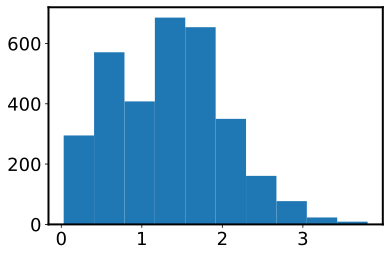

In [97]:
plt.hist(pd_asera_QSO_confirmed['z'])

(array([ 93., 316., 320., 239., 192.,  76.,  34.,   9.,   9.,   4.]),
 array([0.        , 0.45699522, 0.91399045, 1.37098567, 1.82798089,
        2.28497612, 2.74197134, 3.19896657, 3.65596179, 4.11295701,
        4.56995224]),
 <BarContainer object of 10 artists>)

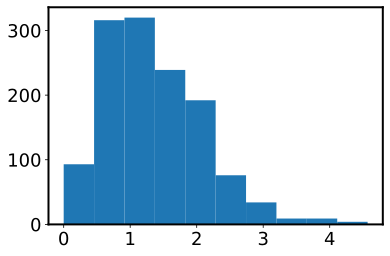

In [98]:
plt.hist(pd_asera_QSOc['z'])

In [99]:
pd_asera.to_csv('/Users/lyubing/Downloads/dr10_dr11q12_asera_check.csv',index=False)

In [101]:
pd_asera[pd_asera['objdec']<0]

#cols: spUrl templateGroup  \
343   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
344   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
448   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
449   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
450   file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
...                                                 ...           ...   
5277  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
5278  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
5279  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
5280  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   
5309  file:////Users/lyubing/Downloads/LAMOST/LAMOST...       Default   

       templateName         z  targetID       objra    objdec userClass  \
343   qso_model.csv  0.601369       NaN  359.585900 -1.602894       QSO   
344   qso_model.csv  2.639633       NaN    0.498650 -1.294966   Unknown   
448   qso_model.csv  0.492160       NaN  200.053460 -0.549776       QSO   
449   qso_model.csv  1.293673       NaN  199.032347 -0.444578      QSO?   
450   qso_model.csv  1.379232       NaN  198.484903 -0.554168      QSO?   
...             ...       ...       ...         ...       ...       ...   
5277  qso_model.csv  0.484648       NaN  172.470020 -1.524578       QSO   
5278  qso_model.csv  0.268332       NaN  173.634580 -0.930055       QSO   
5279  qso_model.csv  1.713745       NaN  174.705421 -0.757421   Unknown   
5280  qso_model.csv  1.257732       NaN  172.985152 -0.172538       QSO   
5309  qso_model.csv  0.000000       NaN  150.313084 -2.068019   Unknown   

      userComments  label  
343            NaN    0.0  
344            NaN   99.0  
448            NaN    0.0  
449            NaN    2.0  
450            NaN    2.0  
...            ...    ...  
5277           NaN    0.0  
5278           NaN    0.0  
5279           NaN   99.0  
5280           NaN    0.0  
5309           NaN   99.0  

[576 rows x 10 columns]

# [ZTFlc for lamost_QSOdownload](http://localhost:8888/notebooks/blog/brettlv.github.io_origin/pythoncode/changinglookAGN/CLAGN_Candidate_BAT_ZTF.ipynb)

In [14]:
pd_LAMOST_dr10_match_z_SDSS16=pd.read_csv('/Users/lyubing/Downloads/LAMOST/pd_LAMOST_dr10_match_z_SDSS16.csv')

In [15]:
pd_LAMOST_dr10_match_z_SDSS16

#cols: spUrl   zlamost     zSDSS  \
0     spec-59646-HD141501N234109M02_sp04-172.fits.gz  1.772350  1.771086   
1     spec-59585-HD095221N375452M02_sp11-077.fits.gz  0.205387  0.205535   
2     spec-59647-HD141644N531548M01_sp09-129.fits.gz  0.761284  0.758102   
3     spec-59551-HD093702N162616M01_sp15-097.fits.gz  0.416529  0.415725   
4     spec-59614-HD083415N451147B02_sp08-152.fits.gz  0.254398  0.254400   
...                                              ...       ...       ...   
1422  spec-59637-HD102942N012928M03_sp07-149.fits.gz  1.870760  1.870873   
1423  spec-59523-EG003455N132216M01_sp13-172.fits.gz  1.889850  1.883025   
1424  spec-59732-HD150715N223351M01_sp15-066.fits.gz  0.238980  0.238889   
1425  spec-59585-HD095221N375452M02_sp08-146.fits.gz  2.271063  2.261201   
1426  spec-59666-HD141501N234109M01_sp09-207.fits.gz  2.275320  2.281270   

           objra     objdec  
0     213.502668  23.598623  
1     147.701667  39.447350  
2     215.851018  53.586442  
3     143.620016  17.675373  
4     129.245604  44.433944  
...          ...        ...  
1422  158.614880  -0.376055  
1423   10.099040  14.135390  
1424  225.619097  23.324977  
1425  149.596160  37.205097  
1426  214.664360  24.168157  

[1427 rows x 5 columns]

## sdssmatched

In [5]:
from ztfquery import lightcurve
#lcq = lightcurve.LCQuery.from_position(299.412,50.55500, 3)

In [ ]:
def ztfdata_download(ra,dec,pathztf):
    data = lightcurve.LCQuery.download_data(circle=[ra,dec,0.0014],BAD_CATFLAGS_MASK=32768)
    

In [4]:
import os

Fits_DR10_dir='/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/'
LAMOST_dr10_qsobySDSS_dir=os.path.join(Fits_DR10_dir,'LAMOST_dr10_qsobySDSS/')  


lamostdr10_12_matchSDSS_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS'
if not os.path.exists(lamostdr10_12_matchSDSS_ztfdata):
    os.mkdir(lamostdr10_12_matchSDSS_ztfdata)

In [104]:
LAMOST_dr10_qsobySDSS_dir

'/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/'

In [108]:
pd_LAMOST_dr10_match_z_SDSS16.columns

Index(['#cols: spUrl', 'zlamost', 'zSDSS', 'objra', 'objdec'], dtype='object')

In [113]:
len(pd_LAMOST_dr10_match_z_SDSS16)

1427

In [17]:
for index,i in enumerate(pd_LAMOST_dr10_match_z_SDSS16['#cols: spUrl']):
    
    files_fits_path_i=os.path.join(LAMOST_dr10_qsobySDSS_dir,i)
    if os.path.exists(files_fits_path_i): 
        #print(files_fits_path_i)
        
        hdul_i=fits.open(files_fits_path_i)
        
        obsid_i= hdul_i[0].header['OBSID']
        ra=hdul_i[0].header['RA']
        dec=hdul_i[0].header['DEC']


        save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)

        #for band in ztf_bands:
        if not os.path.exists('%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name)):
            data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                              dec,2.0/3600], 
                                                               #bandname=band,
                                                               BAD_CATFLAGS_MASK=32768)
            pd_ztf_i=data_g
            pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
            pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
            pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']

            if len(pd_ztf_i_zg)>0 and len(pd_ztf_i_zr)>0:                
                    data_g.to_csv('%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name),index=False) 
                    time.sleep(1+np.random.randint(3,10))  
            else:
                print(index,files_fits_path_i)
                #time.sleep(2)

55 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59647-HD123751N041718M02_sp02-147.fits.gz
70 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59700-HD124814N133310M02_sp13-081.fits.gz
84 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59581-HD113827N080803M01_sp06-155.fits.gz
91 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59606-HD133552N081734M01_sp03-151.fits.gz
126 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59700-HD151331N050239M01_sp04-088.fits.gz
227 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59647-HD123751N041718M02_sp01-013.fits.gz
231 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59703-HD164551N460240M01_sp15-025.fits.gz
235 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/spec-59585-HD113827N080803M02_sp06-155.fits.gz
286 /Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDS

In [18]:
lamostdr10_12_matchSDSS_ztfdata

'/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS'

In [20]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS/*.csv | wc -l

    1373


# dr9_qso_disk

In [10]:
asera_check_results_dr9_part1=pd.read_csv('/Users/lyubing/Downloads/LAMOST/lamost_qso_disk/asera_check_results_dr9_part1.csv',skiprows=[0])

In [20]:
len(asera_check_results_dr9_part1)

687

In [24]:
for i in range(len(asera_check_results_dr9_part1)):
    
    path_i= asera_check_results_dr9_part1['#cols: spUrl'][i][8:]
    path_destination= '/Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/'
    
    cmd_='mv %s %s'%(path_i,path_destination)
    print(cmd_)
    #if os.path.exists(path_i):
        #os.system(cmd_)
    
    

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2323-spec-58784-GACII000N48M1_sp09-085.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/3069-spec-58399-GACII355N46M1_sp05-117.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2142-spec-58435-GACII032N44M1_sp10-016.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2573-spec-59202-GACII043N37M1_sp03-135.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2603-spec-59352-GACII285N46M1_sp06-221.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1842-spec-58097-GACII090N65M1_sp14-156.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1750-spec-58046-GACII080N64M1_sp04-062.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2214-spec-58403-GACII016N43M1_sp09-090.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2147-spec-58435-GACII032N44M1_sp10-146.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1746-spec-58046-GACII080N64M1_sp09-049.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2159-spec-58435-GACII032N44M1_sp13-173.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1535-spec-57696-M31356N43M1_sp05-059.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2368-spec-58838-GACII038N37M1_sp13-246.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/3014-spec-57733-M31022N47B1_sp11-049.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2453-spec-59144-GACII304N21M1_sp04-027.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamo

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2001-spec-58403-GACII016N43M1_sp11-184.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2514-spec-59166-GACII038N42M1_sp05-158.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1775-spec-58046-GACII080N64M1_sp11-128.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2445-spec-59142-GACII340N44M1_sp10-235.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1958-spec-58399-GACII355N46M1_sp16-188.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2688-spec-59144-GACII304N21M1_sp07-189.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2774-spec-59255-GAC100N32M1_sp08-164.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1966-spec-58403-GACII016N43M1_sp03-076.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2789-spec-59352-GACII285N46M1_sp11-151.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2190-spec-58487-HD024343N412952V02_sp04-150.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMO

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2996-spec-57731-M31016N43B1_sp16-136.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2279-spec-58783-GACII001N45M1_sp12-005.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2335-spec-58784-GACII000N48M1_sp15-137.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2251-spec-58782-GACII017N47M2_sp12-020.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2176-spec-58435-GACII032N44M1_sp16-084.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/la

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1866-spec-58398-GACII038N55M1_sp10-080.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2054-spec-58424-GACII018N51M1_sp08-162.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2834-spec-56321-VB058N31V2_sp14-090.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2399-spec-59139-GACII342N46M1_sp01-023.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2409-spec-59139-GACII342N46M1_sp06-188.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lam

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2466-spec-59145-GACII322N31M1_sp09-046.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2854-spec-56683-VB063N29V2_sp01-164.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2561-spec-59166-GACII038N42M1_sp15-048.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1857-spec-58398-GACII038N55M1_sp02-145.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2845-spec-56609-GAC093N22M1_sp09-057.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamos

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1530-spec-57696-M31356N43M1_sp15-191.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2859-spec-56957-M31011N44M1_sp15-191.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/3078-spec-58424-GACII018N51M1_sp04-228.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2433-spec-59142-GACII340N44M1_sp05-018.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2363-spec-58838-GACII038N37M1_sp11-092.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamo

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1951-spec-58399-GACII355N46M1_sp14-072.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2292-spec-58783-HD064550S004259B02_sp16-048.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2993-spec-57731-M31016N43B1_sp06-171.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2522-spec-59166-GACII038N42M1_sp06-041.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2348-spec-58813-GACII026N46M1_sp06-043.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMO

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2160-spec-58435-GACII032N44M1_sp14-015.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2355-spec-58813-GACII026N46M1_sp08-115.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1900-spec-58399-GACII355N46M1_sp04-106.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2540-spec-59166-GACII038N42M1_sp09-201.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2782-spec-59352-GACII285N46M1_sp05-190.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2666-spec-59111-HD232319N520609B01_sp04-190.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2991-spec-57731-M31016N43B1_sp14-226.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/3121-spec-59112-GACII306N29B1_sp16-246.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2011-spec-58403-GACII016N43M1_sp13-105.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2017-spec-58403-GACII016N43M1_sp14-056.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMO

mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/1851-spec-58107-GACII033N47M1_sp02-076.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2536-spec-59166-GACII038N42M1_sp09-068.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2946-spec-57693-M31000N46M1_sp14-075.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2150-spec-58435-GACII032N44M1_sp10-221.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2441-spec-59142-GACII340N44M1_sp09-047.fits.gz /Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/
mv /Users/lyubing/Downloads/LAMOST/la

In [18]:
asera_check_results_dr9_part1['#cols: spUrl'][0][8:]

'/Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2323-spec-58784-GACII000N48M1_sp09-085.fits.gz'

In [68]:
asera_check_results_dr9=pd.read_csv('/Users/lyubing/Downloads/LAMOST/lamost_qso_disk/asera_check_results_dr9——1501-3156.csv',skiprows=None)
asera_check_results_dr9=asera_check_results_dr9[asera_check_results_dr9['#cols: spUrl'].notnull()]

In [69]:
asera_check_results_dr9

#cols: spUrl templateGroup  \
0     file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   
1     file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   
2     file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   
3     file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   
4     file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   
...                                                 ...           ...   
1651  file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   
1652  file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   
1653  file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   
1654  file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   
1655  file:////Users/lyubing/Downloads/LAMOST/lamost...       Default   

       templateName         z  targetID       objra     objdec userClass  \
0     qso_model.csv  1.956873       NaN    0.000000   0.000000       QSO   
1     qso_model.csv  0.048998       NaN  104.277330  29.154263      QSO?   
2     qso_model.csv  0.289351       NaN  107.023480  27.527449   Unknown   
3     qso_model.csv  0.420841       NaN    0.000000   0.000000   Unknown   
4     qso_model.csv  1.472665       NaN    0.000000   0.000000   Unknown   
...             ...       ...       ...         ...        ...       ...   
1651  qso_model.csv  0.212869       NaN   28.529615  42.970967       QSO   
1652  qso_model.csv  0.360046       NaN   68.525807  24.314135   Unknown   
1653  qso_model.csv  0.970696       NaN  100.266408   9.969281   Unknown   
1654  qso_model.csv  0.000000       NaN    0.000000   0.000000    Absorp   
1655  qso_model.csv  2.443273       NaN    0.000000   0.000000   Unknown   

      userComments  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
1651           NaN  
1652           NaN  
1653           NaN  
1654           NaN  
1655           NaN  

[1656 rows x 9 columns]

asera_check_results_dr9.columns

In [70]:
asera_check_results_dr9_unknown=asera_check_results_dr9[asera_check_results_dr9['userClass']=='Unknown']

In [71]:
len(asera_check_results_dr9_unknown)

541

In [72]:
asera_check_results_dr9_z0=asera_check_results_dr9[asera_check_results_dr9['z']==0]
asera_check_results_dr9_z0=drop_index(asera_check_results_dr9_z0)

In [73]:
asera_check_results_dr9_z0_qso=asera_check_results_dr9_z0[asera_check_results_dr9_z0['userClass']=='QSO']
asera_check_results_dr9_z0_qso=drop_index(asera_check_results_dr9_z0_qso)

In [74]:
for i in range(len(asera_check_results_dr9_z0_qso)):       
    path_i= asera_check_results_dr9_z0_qso['#cols: spUrl'][i][8:]
    print(path_i)

In [58]:
asera_check_results_dr9_z0_qso[asera_check_results_dr9.columns[0]][0][8:]

'/Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/2890-spec-57690-GAC058N31B1_sp14-094.fits.gz'

In [67]:
3156-1501

1655

os.mkdir('/Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/QSO_z0?/')

for i in range(len(asera_check_results_dr9_z0_qso)):
    
    path_i= asera_check_results_dr9_z0_qso['#cols: spUrl'][i][8:]
    #path_destination= '/Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/visual_ed/'
    path_destination='/Users/lyubing/Downloads/LAMOST/lamost_qso_disk/fits_dr9/1501-END/QSO_z0?/'
    print(path_i)
    cmd_='mv %s %s'%(path_i,path_destination)
    #print(cmd_)
    #if os.path.exists(path_i):
        #os.system(cmd_)

# Generate line parameter file

In [71]:
import numpy as np
import os
from astropy.io import fits
path='./output/'
path_ex='./output/'

In [76]:
ls output/

qsopar.fits


In [74]:
newdata = np.rec.array([(6564.61,'Ha',6400.,6800.,'Ha_br',3,5e-3,0.004,0.017,0.015,0,0,0,0.05),\
                        (6564.61,'Ha',6400.,6800.,'Ha_na',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (6549.85,'Ha',6400.,6800.,'NII6549',1,1e-3,2.3e-4,0.0017,5e-3,1,1,1,0.001),\
                        (6585.28,'Ha',6400.,6800.,'NII6585',1,1e-3,2.3e-4,0.0017,5e-3,1,1,1,0.003),\
                        (6718.29,'Ha',6400.,6800.,'SII6718',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        (6732.67,'Ha',6400.,6800.,'SII6732',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        
                        (4862.68,'Hb',4640.,5100.,'Hb_br',3,5e-3,0.004,0.022,0.01,0,0,0,0.01),\
                        (4862.68,'Hb',4640.,5100.,'Hb_na',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (4960.30,'Hb',4640.,5100.,'OIII4959',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (5008.24,'Hb',4640.,5100.,'OIII5007',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.004),\
                        (4955.30,'Hb',4640.,5100.,'OIII4959w',1,1e-3,2.3e-4,0.0017,0.01,2,2,0,0.001),\
                        (4995.24,'Hb',4640.,5100.,'OIII5007w',1,1e-3,2.3e-4,0.0017,0.01,2,2,0,0.002),\
                        # (4687.02,'Hb',4640.,5100.,'HeII4687_br',1,5e-3,0.004,0.05,0.005,0,0,0,0.001),\
                        # (4687.02,'Hb',4640.,5100.,'HeII4687_na',1,1e-3,2.3e-4,0.0017,0.005,1,1,0,0.001),\
                        # (4341.68,'Hg',4250.,4440.,'Hg_br',1,5e-3,0.004,0.025,0.0017,0,0,0,0.05),\
                        # (4341.68,'Hg',4250.,4440.,'Hg_na',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        # (4364.44,'Hg',4250.,4440.,'OIII4364',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        #( 3934.78,'CaII',3900.,3960.,'CaII3934',2,1e-3,3.333e-4,0.0017,0.01,99,0,0,-0.001),\
                        
                        (3728.48,'OII',3650.,3800.,'OII3728',1,1e-3,3.333e-4,0.0017,0.01,1,1,0,0.001),\
                        
                        #(3426.84,'NeV',3380.,3480.,'NeV3426',1,1e-3,3.333e-4,0.0017,0.01,0,0,0,0.001),\
                        #(3426.84,'NeV',3380.,3480.,'NeV3426_br',1,5e-3,0.0025,0.02,0.01,0,0,0,0.001),\
                        
                        (2798.75,'MgII',2700.,2900.,'MgII_br',2,5e-3,0.004,0.015,0.0017,0,0,0,0.05),\
                        (2798.75,'MgII',2700.,2900.,'MgII_na',1,1e-3,2.3e-4,0.0017,0.01,0,0,0,0.002),\
                        
                        
                        (1908.73,'CIII',1700.,1970.,'CIII_br',2,5e-3,0.004,0.015,0.015,99,0,0,0.01),\
                        #(1908.73,'CIII',1700.,1970.,'CIII_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        #(1892.03,'CIII',1700.,1970.,'SiIII1892',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1857.40,'CIII',1700.,1970.,'AlIII1857',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1816.98,'CIII',1700.,1970.,'SiII1816',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1786.7,'CIII',1700.,1970.,'FeII1787',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1750.26,'CIII',1700.,1970.,'NIII1750',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        #(1718.55,'CIII',1700.,1900.,'NIV1718',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        
                        (1549.06,'CIV',1500.,1700.,'CIV_br',3,5e-3,0.004,0.015,0.015,0,0,0,0.05),\
#                        (1549.06,'CIV',1500.,1700.,'CIV_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640',1,1e-3,5e-4,0.0017,0.008,1,1,0,0.002),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663',1,1e-3,5e-4,0.0017,0.008,1,1,0,0.002),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640_br',1,5e-3,0.0025,0.02,0.008,1,1,0,0.002),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663_br',1,5e-3,0.0025,0.02,0.008,1,1,0,0.002),\
                        
                        #(1402.06,'SiIV',1290.,1450.,'SiIV_OIV1',1,5e-3,0.002,0.05,0.015,1,1,0,0.05),\
                        #(1396.76,'SiIV',1290.,1450.,'SiIV_OIV2',1,5e-3,0.002,0.05,0.015,1,1,0,0.05),\
                        #(1335.30,'SiIV',1290.,1450.,'CII1335',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        #(1304.35,'SiIV',1290.,1450.,'OI1304',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        
                        # (1215.67,'Lya',1150.,1290.,'Lya_br',3,5e-3,0.004,0.05,0.02,0,0,0,0.05),\
                        # (1215.67,'Lya',1150.,1290.,'Lya_na',1,1e-3,5e-4,0.0017,0.01,0,0,0,0.002),\
                        # (1240.14,'Lya',1150.,1290.,'NV',1,1e-3,5e-4,0.0017,0.01,0,0,0,0.002)\
                        ],\
                     formats='float32,a20,float32,float32,a20,float32,float32,float32,float32,\
                     float32,float32,float32,float32,float32',\
                     names='lambda,compname,minwav,maxwav,linename,ngauss,inisig,minsig,maxsig,voff,vindex,windex,findex,fvalue')
#------header-----------------
hdr = fits.Header()
hdr['lambda'] = 'Vacuum Wavelength in Ang'
hdr['minwav'] = 'Lower complex fitting wavelength range'
hdr['maxwav'] = 'Upper complex fitting wavelength range'
hdr['ngauss'] = 'Number of Gaussians for the line'
hdr['inisig'] = 'Initial guess of linesigma [in lnlambda]'
hdr['minsig'] = 'Lower range of line sigma [lnlambda]'  
hdr['maxsig'] = 'Upper range of line sigma [lnlambda]'
hdr['voff  '] = 'Limits on velocity offset from the central wavelength [lnlambda]'
hdr['vindex'] = 'Entries w/ same NONZERO vindex constrained to have same velocity'
hdr['windex'] = 'Entries w/ same NONZERO windex constrained to have same width'
hdr['findex'] = 'Entries w/ same NONZERO findex have constrained flux ratios'
hdr['fvalue'] = 'Relative scale factor for entries w/ same findex'
#------save line info-----------
hdu = fits.BinTableHDU(data=newdata,header=hdr,name='data')
hdu.writeto(path+'qsopar.fits',overwrite=True)

In [77]:
from astropy.table import Table
tbdata = Table.read(path+"qsopar.fits")
tbdata

<Table length=17>
 lambda compname  minwav  maxwav  linename  ngauss  inisig   minsig   maxsig   voff   vindex  windex  findex  fvalue
float32 bytes20  float32 float32  bytes20  float32 float32  float32  float32 float32 float32 float32 float32 float32
------- -------- ------- ------- --------- ------- ------- --------- ------- ------- ------- ------- ------- -------
6564.61       Ha  6400.0  6800.0     Ha_br     3.0   0.005     0.004   0.017   0.015     0.0     0.0     0.0    0.05
6564.61       Ha  6400.0  6800.0     Ha_na     1.0   0.001   0.00023  0.0017    0.01     1.0     1.0     0.0   0.002
6549.85       Ha  6400.0  6800.0   NII6549     1.0   0.001   0.00023  0.0017   0.005     1.0     1.0     1.0   0.001
6585.28       Ha  6400.0  6800.0   NII6585     1.0   0.001   0.00023  0.0017   0.005     1.0     1.0     1.0   0.003
6718.29       Ha  6400.0  6800.0   SII6718     1.0   0.001   0.00023  0.0017   0.005     1.0     1.0     2.0   0.001
6732.67       Ha  6400.0  6800.0   SII6732     1.0   0.001   0.00023  0.0017   0.005     1.0     1.0     2.0   0.001
4862.68       Hb  4640.0  5100.0     Hb_br     3.0   0.005     0.004   0.022    0.01     0.0     0.0     0.0    0.01
4862.68       Hb  4640.0  5100.0     Hb_na     1.0   0.001   0.00023  0.0017    0.01     1.0     1.0     0.0   0.002
 4960.3       Hb  4640.0  5100.0  OIII4959     1.0   0.001   0.00023  0.0017    0.01     1.0     1.0     0.0   0.002
5008.24       Hb  4640.0  5100.0  OIII5007     1.0   0.001   0.00023  0.0017    0.01     1.0     1.0     0.0   0.004
 4955.3       Hb  4640.0  5100.0 OIII4959w     1.0   0.001   0.00023  0.0017    0.01     2.0     2.0     0.0   0.001
4995.24       Hb  4640.0  5100.0 OIII5007w     1.0   0.001   0.00023  0.0017    0.01     2.0     2.0     0.0   0.002
3728.48      OII  3650.0  3800.0   OII3728     1.0   0.001 0.0003333  0.0017    0.01     1.0     1.0     0.0   0.001
2798.75     MgII  2700.0  2900.0   MgII_br     2.0   0.005     0.004   0.015  0.0017     0.0     0.0     0.0    0.05
2798.75     MgII  2700.0  2900.0   MgII_na     1.0   0.001   0.00023  0.0017    0.01     0.0     0.0     0.0   0.002
1908.73     CIII  1700.0  1970.0   CIII_br     2.0   0.005     0.004   0.015   0.015    99.0     0.0     0.0    0.01
1549.06      CIV  1500.0  1700.0    CIV_br     3.0   0.005     0.004   0.015   0.015     0.0     0.0     0.0    0.05

# ebossdir

In [83]:
ebossdir='/Users/lyubing/Downloads/LAMOST_青年研究员/dr17/eboss/spectro/redux/v5_13_2/spectra/lite/'

# SDSSdir

In [84]:
SDSSdir='/Users/lyubing/Downloads/LAMOST_青年研究员/dr17/sdss/spectro/redux/26/spectra/lite/'

In [78]:
#!/usr/bin/env python
import os
import numpy as np
import pandas as pd
from glob import glob
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from qsofitmore import QSOFitNew

In [79]:
import qsofitmore

In [101]:
class SdssSpec():
    '''
    A simple class to load SDSS spectrum.
    
    '''
    def __init__(self, fname, redshift=None, scale_flux=False):
        """
        Initialize SdssSpec object from a SDSS 1D spectrum file.
        Parameters:
        ----------
            fname : str
                name of the fits file.
            redshift : float
                redshift of the spectrum. Should be provided if not recorded in the fits header.
            scale_flux : bool (`True` or `False`)
                When `True`, the flux and err are multiplied by 1e-17; `False` by default.
        Example:
        ----------
        sp = SdssSpec("spec-plateid-mjd-fiberid.fits", redshift=0.01)
        """
        hdu = fits.open(fname)
        basename = os.path.basename(fname)
        self.basename = basename
        hdr = hdu[0].header
        self.hdr = hdr
        self.ra=hdr['plug_ra']          # RA 
        self.dec=hdr['plug_dec']        # DEC
        self.plateid = hdr['plateid']   # SDSS plate ID
        self.mjd = hdr['mjd']           # SDSS MJD
        self.fiberid = hdr['fiberid']   # SDSS fiber ID
        self.scale_flux = scale_flux
        if redshift is None:
            try: 
                redshift = hdu[2].data['z']
            except: 
                raise ValueError('Redshift not provided. '+ 
                                 'Please check the input parameters carefully.')
        self.redshift = redshift[0]
        data = hdu[1].data
        hdu.close()     
        wave = 10**data['loglam']
        flux = data['flux']
        ivar = pd.Series(data['ivar'])
        ivar.replace(0, np.nan, inplace=True)
        ivar_safe = ivar.interpolate()
        err = 1./np.sqrt(ivar_safe.values)
        if scale_flux == True:
            flux *= 1e-17
            err *= 1e-17
        self.wave = wave
        self.flux = flux
        self.err = err    
        
        
    def plot(self):
        plt.figure()
        plt.plot(self.wave, self.flux)
        plt.xlabel(r'Wavelength [$\mathrm{\AA}$]')
        if self.scale_flux == True:
            plt.ylabel(r'Flux [$\mathrm{erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        else:
            plt.ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        
        plt.title(self.basename)
        
        
        
    def plot_restframe(self):
        fig=plt.figure()
        plt.plot(self.wave/(1+self.redshift), self.flux)
        plt.xlabel(r'Wavelength/(1+z) [$\mathrm{\AA}$]')
        
        if self.scale_flux == False:
            plt.ylabel(r'Flux [$\mathrm{erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        else:
            plt.ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        
        plt.title(self.basename+' z=%.3f'%self.redshift)
        return fig

In [87]:
os.listdir(os.path.join(SDSSdir,'2014'))

['spec-2014-53460-0616.fits']

In [94]:
#sp1 = SdssSpec('./data/spec-0276-51909-0251.fits')
sp1 = SdssSpec('%s/spec-2014-53460-0616.fits'%os.path.join(SDSSdir,'2014'))

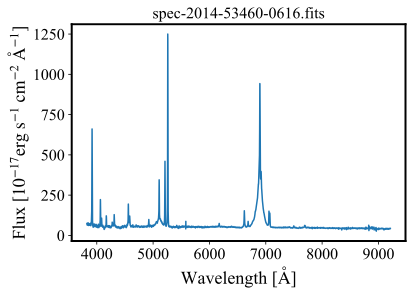

In [95]:
sp1.plot()

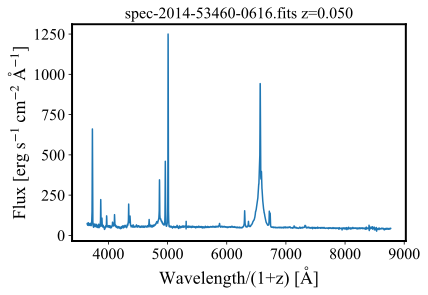

In [96]:
sp1.plot_restframe()

In [99]:
#sp1 = SdssSpec('./data/spec-0276-51909-0251.fits')

#sp2 = SdssSpec('%s/spec-5888-56041-477.fits'%os.path.join(SDSSdir,'5888'))
sp2 = SdssSpec('%s/spec-5888-56041-0477.fits'%os.path.join(ebossdir,'5888'))

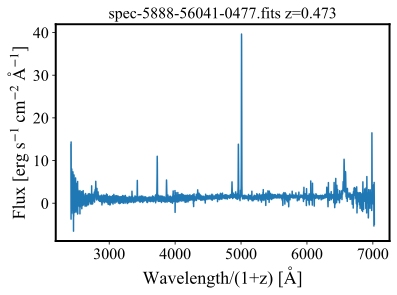

In [100]:
sp2.plot_restframe()

In [112]:
LAMOST6789_DR14_galaxy#['plate'].dtype

ra1       dec1  distance                objid         ra2  \
0   165.671600  18.057940  0.026615  1237668288014254492  165.671870   
1     1.751603  25.130630  0.000025  1237666245230723486    1.751597   
2   136.222000  24.375420  0.046034  1237665127988133989  136.221280   
3   137.941700  23.853520  0.043179  1237667142866174148  137.942340   
4   182.453500  22.742390  0.000845  1237667735581556824  182.453530   
5   146.896800  57.534050  0.000054  1237654383591686334  146.896910   
6   162.178400  53.912670  0.035511  1237657591928193172  162.178070   
7   136.176700  45.554730  0.000207  1237657607503216766  136.176630   
8   186.003500  22.603830  0.039386  1237667782835175614  186.003490   
9   211.309700  14.632620  0.000041  1237668348134424665  211.309690   
10  122.608500  23.699020  0.009011  1237661087492538688  122.608630   
11  187.630700  25.309480  0.000287  1237667447804657818  187.630760   
12  356.295200  12.311140  0.049778  1237678859006902380  356.294810   
13  154.792000  48.079770  0.000192  1237657628983754852  154.792020   
14  190.713900  24.525350  0.000866  1237667911132381338  190.713920   
15  199.439600   5.736360  0.000039  1237655126626402397  199.439570   
16  136.607700  18.672800  0.000581  1237667292651389186  136.607730   
17   22.827840   0.858318  0.000025  1237663785281126550   22.827857   
18   35.306450  -3.094324  0.001808  1237679255745593492   35.306438   
19  188.036300  34.788930  0.000408  1237665024906166410  188.036350   

         dec2        z2    mjd  plate  fiberid   class  
0   18.058297  0.472945  56041   5888      477  GALAXY  
1   25.130627  0.240889  56544   6877      124  GALAXY  
2   24.375854  0.562878  56010   5776      835  GALAXY  
3   23.853962  0.352828  56009   5775      648  GALAXY  
4   22.742391  0.025894  54210   2644      481  GALAXY  
5   57.534072  0.143325  52253    557      421  GALAXY  
6   53.912142  0.272374  56636   6703      866  GALAXY  
7   45.554774  0.181150  52606    898      184  GALAXY  
8   22.603176  0.415751  56329   5979      242  GALAXY  
9   14.632615  0.101498  53178   1704      443  GALAXY  
10  23.698942  0.133509  52943   1584      529  GALAXY  
11  25.309501  0.022285  54498   2659      423  GALAXY  
12  12.311877  0.654032  56187   6150      221  GALAXY  
13  48.079782  0.051020  52674    873      224  GALAXY  
14  24.525371  0.267761  54504   2660      147  GALAXY  
15   5.736363  0.273360  52376    851      417  GALAXY  
16  18.672799  0.156029  53700   2285      104  GALAXY  
17   0.858306  0.160497  51820    400      378  GALAXY  
18  -3.094352  0.099030  57331   7883      834  GALAXY  
19  34.788931  0.070801  53819   2015      618  GALAXY

## rootdir

In [116]:
rootdir='/Users/lyubing/Downloads/LAMOST_青年研究员/'

5888 56041 477
0 /Users/lyubing/Downloads/LAMOST_青年研究员/dr17/eboss/spectro/redux/v5_13_2/spectra/lite/5888/spec-5888-56041-0477.fits
6877 56544 124
1 /Users/lyubing/Downloads/LAMOST_青年研究员/dr17/eboss/spectro/redux/v5_13_2/spectra/lite/6877/spec-6877-56544-0124.fits
5776 56010 835
2 /Users/lyubing/Downloads/LAMOST_青年研究员/dr17/eboss/spectro/redux/v5_13_2/spectra/lite/5776/spec-5776-56010-0835.fits
5775 56009 648
3 /Users/lyubing/Downloads/LAMOST_青年研究员/dr17/eboss/spectro/redux/v5_13_2/spectra/lite/5775/spec-5775-56009-0648.fits
2644 54210 481
4 /Users/lyubing/Downloads/LAMOST_青年研究员/dr17/sdss/spectro/redux/26/spectra/lite/2644/spec-2644-54210-0481.fits
557 52253 421
5 /Users/lyubing/Downloads/LAMOST_青年研究员/dr17/sdss/spectro/redux/26/spectra/lite/0557/spec-0557-52253-0421.fits
6703 56636 866
6 /Users/lyubing/Downloads/LAMOST_青年研究员/dr17/eboss/spectro/redux/v5_13_2/spectra/lite/6703/spec-6703-56636-0866.fits
898 52606 184
7 /Users/lyubing/Downloads/LAMOST_青年研究员/dr17/sdss/spectro/redux/26/spectra/

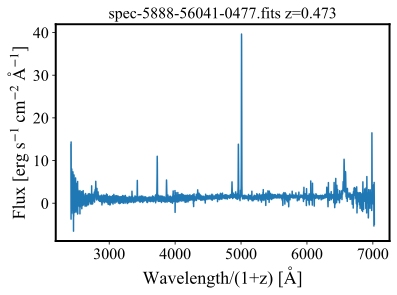

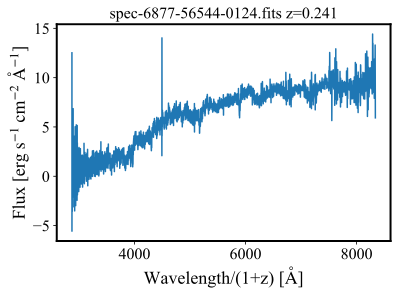

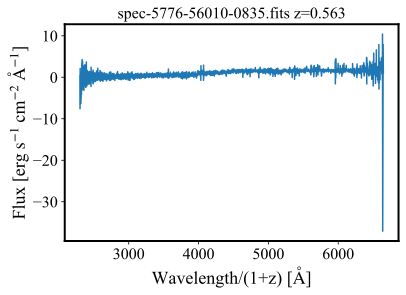

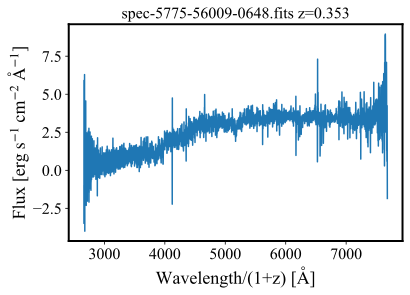

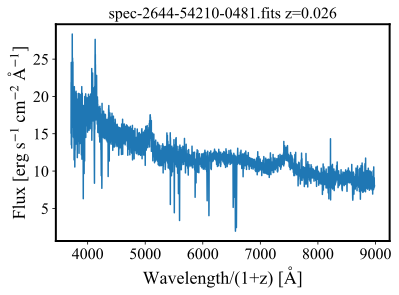

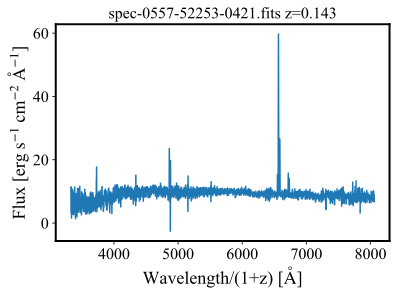

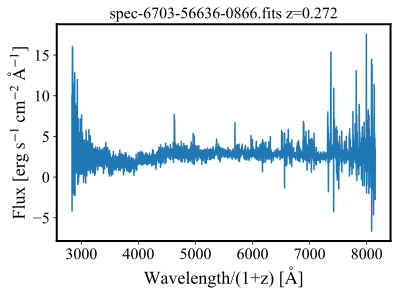

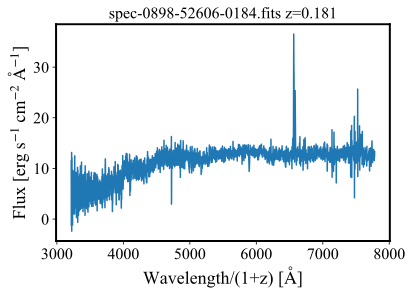

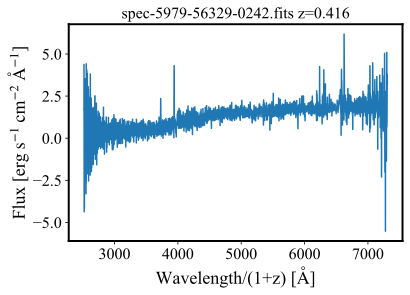

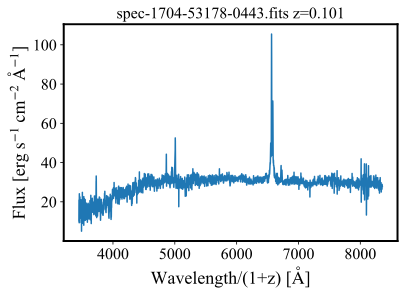

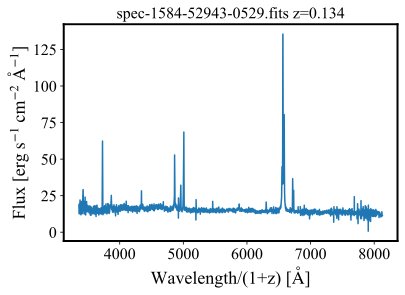

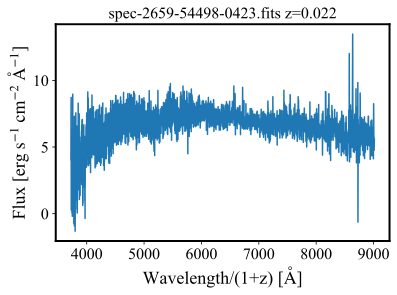

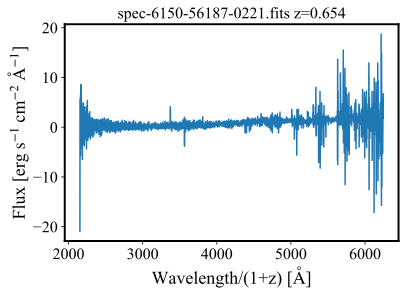

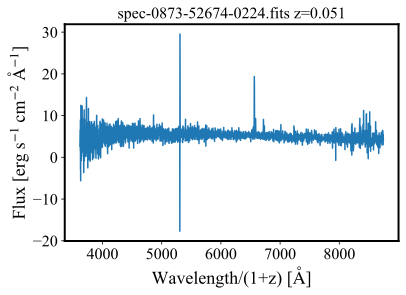

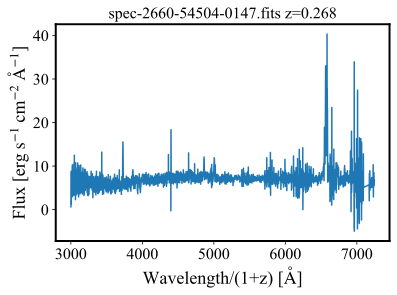

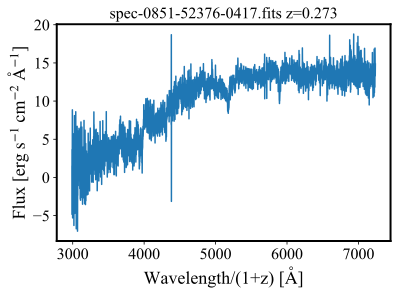

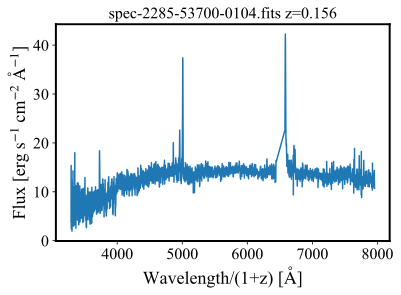

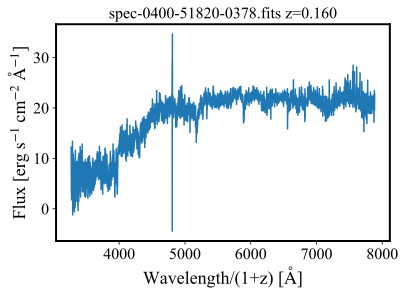

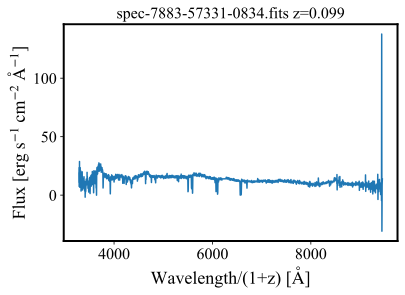

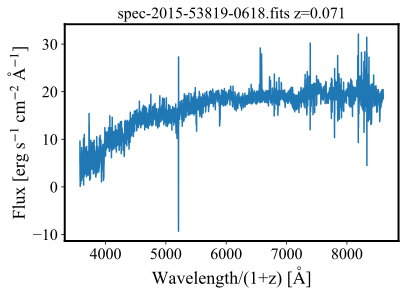

In [117]:
for i in range(len(LAMOST6789_DR14_galaxy)):    
    #print(LAMOST6789_DR14_galaxy['plate'][i],',',LAMOST6789_DR14_galaxy['mjd'][i],',',LAMOST6789_DR14_galaxy['fiberid'][i])
    
    plate_=LAMOST6789_DR14_galaxy['plate'][i]
    mjd_=LAMOST6789_DR14_galaxy['mjd'][i]
    fiberid_=LAMOST6789_DR14_galaxy['fiberid'][i]
    
    print(plate_,mjd_,fiberid_)
    #print(plate_.dtype,mjd_.dtype,fiberid_.dtype)
    
    if fiberid_< 1000:
        fiberid_str='0%d'%fiberid_
    else:
        fiberid_str='%d'%fiberid_
        
    
    if plate_< 1000:
        plate_str='0%d'%plate_
    else:
        plate_str='%d'%plate_ 
        
        
    
    path_sp_eboss='%s/spec-%s-%d-%s.fits'%(os.path.join(ebossdir,'%s'%plate_str),plate_str,mjd_,fiberid_str)
    path_sp_sdss='%s/spec-%s-%d-%s.fits'%(os.path.join(SDSSdir,'%s'%plate_str),plate_str,mjd_,fiberid_str)

    if os.path.exists(path_sp_sdss):
        sp=SdssSpec(path_sp_sdss)
        sp_path=path_sp_sdss  
        print(i,sp_path)
        fig=sp.plot_restframe()    
        fitname=sp_path.split('/')[-1][:-5]
        fig.savefig('%s/%s.png'%(rootdir,fitname),dpi=300,transparent=False, bbox_inches='tight')
    
    elif os.path.exists(path_sp_eboss):
        sp=SdssSpec(path_sp_eboss)
        sp_path=path_sp_eboss
        print(i,sp_path)
        fig=sp.plot_restframe()  
        fitname=sp_path.split('/')[-1][:-5]
        fig.savefig('%s/%s.png'%(rootdir,fitname),dpi=300,transparent=False, bbox_inches='tight')
    
    else:
        print('no file for %d,%d,%d'%(plate_,mjd_,fiberid_))
        
    
    
    
    
    

In [49]:
pwd

'/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN'

In [48]:
cd /Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN
